# 잔차분산에 따른 모형의 예측력 비교

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nbeats_keras.model import NBeatsNet as NBeatsKeras
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
#from nbeats_pytorch.model import NBeatsNet as NBeatsPytorch
from keras.optimizers import RMSprop, Adam
import time
#from pretraindata_simulation72_24_scale import sclae_X_train,sclae_y_train

from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, Lambda
from tensorflow.keras.callbacks import EarlyStopping

from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [6]:
np.array(train)[:,72+24*1000:].shape

(100, 23928)

In [5]:
from simul240709 import *

generated data : ###########################################fin


In [7]:
np.array(train)[:,72+24*0:].shape

(100, 47928)

In [8]:
np.array(train)[:,72+24*1500:].shape

(100, 11928)

In [27]:
arima_score2000

[[2.8538005033131557, 1.4044059193398537, 1.2516253510305397]]

In [47]:
from simul240709 import *
N=100
arima_lst2000 = [] 
arima_score2000= [] 
arima_time2000= [] 
#model_data = [split_train_test([random_simul_yt[i].round(3)],horizon,lookback ) for i in range(len(random_simul_yt))]

for i in range(N):
    #y_test= random_simul_yt[i][-24:].round(3)
    train_ =np.array(train)[:,72+24*0:][i]
    time1 = time.time()
    model_arima = auto_arima(train_, seasonal=True, trace=True)
    time2 = time.time()  
    
    
    
    pred = model_arima.predict(24)
    
    me1= mean_squared_error(y_test_[i],pred.flatten())
    me2=mean_absolute_error(y_test_[i],pred.flatten())
    me3=mean_absolute_percentage_error(y_test_[i],pred.flatten())
    
    arima_lst2000.append(pred.flatten())
    arima_score2000.append([me1,me2,me3])
    arima_time2000.append(time2-time1)
    
    
arima_lst1000 = [] 
arima_score1000= [] 
arima_time1000= [] 
#model_data = [split_train_test([random_simul_yt[i].round(3)],horizon,lookback ) for i in range(len(random_simul_yt))]

for i in range(N):
    #y_test= random_simul_yt[i][-24:].round(3)
    train_ =np.array(train)[:,72+24*1000:][i]
    time1 = time.time()
    model_arima = auto_arima(train_, seasonal=True, trace=True)
    time2 = time.time()  
    
    
    
    pred = model_arima.predict(24)
    
    me1= mean_squared_error(y_test_[i],pred.flatten())
    me2=mean_absolute_error(y_test_[i],pred.flatten())
    me3=mean_absolute_percentage_error(y_test_[i],pred.flatten())
    
    arima_lst1000.append(pred.flatten())
    arima_score1000.append([me1,me2,me3])
    arima_time1000.append(time2-time1)
    
arima_lst500 = [] 
arima_score500= [] 
arima_time500= [] 
#model_data = [split_train_test([random_simul_yt[i].round(3)],horizon,lookback ) for i in range(len(random_simul_yt))]

for i in range(N):
    #y_test= random_simul_yt[i][-24:].round(3)
    train_ =np.array(train)[:,72+24*1500:][i]
    time1 = time.time()
    model_arima = auto_arima(train_, seasonal=True, trace=True)
    time2 = time.time()  
    
    
    
    pred = model_arima.predict(24)
    
    me1= mean_squared_error(y_test_[i],pred.flatten())
    me2=mean_absolute_error(y_test_[i],pred.flatten())
    me3=mean_absolute_percentage_error(y_test_[i],pred.flatten())
    
    arima_lst500.append(pred.flatten())
    arima_score500.append([me1,me2,me3])
    arima_time500.append(time2-time1)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=177477.753, Time=9.00 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=202310.401, Time=0.45 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=182456.966, Time=0.98 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=185745.343, Time=2.99 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=202309.742, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=179707.404, Time=5.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=177801.524, Time=20.27 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=36.94 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=174626.513, Time=38.18 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=179135.711, Time=12.35 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=43.05 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=43.55 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=176117.562, Time=16.88 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=49.85 sec
 ARIMA(2,0,3)(0,0,0)[0]  

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=177918.694, Time=8.87 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=202927.103, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=183001.551, Time=0.97 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=186392.684, Time=2.97 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=202925.282, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=180176.958, Time=5.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=178228.418, Time=11.15 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=36.10 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=175270.215, Time=35.99 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=179577.414, Time=13.49 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=46.33 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=46.95 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=176460.822, Time=16.29 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=49.68 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=175268.353, Time=12.19 sec

 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=202647.693, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=182318.624, Time=0.98 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=185507.212, Time=2.98 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=202646.196, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=179419.320, Time=4.97 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=177463.423, Time=9.86 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=38.72 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=174278.165, Time=35.82 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=178837.657, Time=13.86 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=42.61 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=42.88 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=175778.174, Time=17.13 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=51.88 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=174277.662, Time=16.38 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=178835.812, Time=6.47 sec


 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=48.07 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=47.64 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=41.16 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=168081.913, Time=45.98 sec
 ARIMA(4,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=62.88 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=21.28 sec

Best model:  ARIMA(3,0,3)(0,0,0)[0] intercept
Total fit time: 431.703 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=177186.422, Time=11.40 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=202500.837, Time=0.43 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=182304.670, Time=1.19 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=185736.488, Time=2.43 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=202498.838, Time=0.24 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=179376.965, Time=4.57 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=177510.691, Time=18.53 sec
 ARIMA(3,0,2)(0,0,0)[

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=202133.734, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=179636.576, Time=5.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=177631.954, Time=24.80 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=38.68 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=174580.269, Time=33.82 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=179061.996, Time=13.43 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=43.92 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=42.56 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=176009.986, Time=16.43 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=46.83 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=174578.476, Time=14.74 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=179060.083, Time=5.29 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=177430.106, Time=3.89 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=20.80 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=22.15 sec
 ARIMA(1,0,

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=177631.942, Time=8.49 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=202402.609, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=182731.730, Time=1.19 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=186030.671, Time=2.43 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=202400.647, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=179948.470, Time=5.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=177975.581, Time=11.06 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=43.85 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=174696.876, Time=42.82 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=179384.574, Time=13.43 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=44.26 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=46.92 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=176255.682, Time=15.57 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=53.02 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=174694.907, Time=13.57 sec

 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=202386.915, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=182449.273, Time=0.97 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=185757.505, Time=2.44 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=202384.929, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=179570.977, Time=5.45 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=177649.354, Time=21.83 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=42.04 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=174601.399, Time=25.98 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=179128.756, Time=16.06 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=175970.103, Time=30.67 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=47.71 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=176086.174, Time=13.74 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=54.63 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=174599.407, Time=12.15 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=179126.760, Time=6

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=185849.908, Time=2.70 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=202291.716, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=179579.621, Time=4.99 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=177685.660, Time=13.18 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=39.25 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=174695.533, Time=33.79 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=179019.275, Time=13.28 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=48.66 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=44.87 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=175934.807, Time=16.02 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=52.10 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=174693.684, Time=19.81 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=179017.332, Time=5.49 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=177358.967, Time=3.65 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=22.65 sec
 ARIM

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=185800.448, Time=2.44 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=202284.455, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=179936.086, Time=4.58 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=177831.066, Time=16.89 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=39.35 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=174765.909, Time=33.82 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=179383.914, Time=12.31 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=47.07 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=44.28 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=176218.165, Time=15.64 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=51.35 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=18.43 sec

Best model:  ARIMA(2,0,3)(0,0,0)[0] intercept
Total fit time: 296.184 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=177295.600, Time=8.41 sec
 ARIMA(0,0,0)(0,0,0)

 ARIMA(1,0,4)(0,0,0)[0]             : AIC=176193.897, Time=5.84 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=19.52 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=24.09 sec

Best model:  ARIMA(2,0,3)(0,0,0)[0]          
Total fit time: 415.143 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=177664.439, Time=8.86 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=202678.340, Time=0.43 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=182722.727, Time=1.00 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=186038.126, Time=2.44 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=202676.423, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=179932.112, Time=4.57 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=177982.356, Time=9.18 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=37.52 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=174806.215, Time=29.50 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=179354.374, Time=14.95 sec
 ARIMA(3,0

 ARIMA(1,0,4)(0,0,0)[0]             : AIC=176226.068, Time=6.48 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=21.05 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=24.48 sec

Best model:  ARIMA(2,0,3)(0,0,0)[0]          
Total fit time: 401.434 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=177721.065, Time=8.32 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=202574.368, Time=0.43 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=182761.083, Time=0.96 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=186112.978, Time=2.42 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=202572.435, Time=0.24 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=179982.638, Time=5.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=25.89 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=44.83 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=175040.507, Time=28.95 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=179381.209, Time=11.76 sec
 ARIMA(3,0,3)(0,

 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=23.36 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=21.93 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=179942.119, Time=2.30 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=176358.740, Time=6.17 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=18.64 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=26.07 sec

Best model:  ARIMA(2,0,3)(0,0,0)[0]          
Total fit time: 413.427 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=177558.684, Time=7.87 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=202468.877, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=182731.366, Time=0.97 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=185975.246, Time=2.43 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=202466.914, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=179945.115, Time=5.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=177962.121, Time=30.17 sec
 ARIMA(3,0,2)(0,0

 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=23.13 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=23.81 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=179859.376, Time=2.48 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=176193.297, Time=6.19 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=17.23 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=22.41 sec

Best model:  ARIMA(2,0,3)(0,0,0)[0]          
Total fit time: 394.619 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=177263.779, Time=8.37 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=202429.929, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=182294.422, Time=0.97 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=185687.472, Time=2.99 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=202428.103, Time=0.24 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=179440.208, Time=5.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=177475.348, Time=23.38 sec
 ARIMA(3,0,2)(0,0

 ARIMA(2,0,3)(0,0,0)[0]             : AIC=174732.328, Time=9.74 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=179085.954, Time=4.98 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=177493.585, Time=4.12 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=22.98 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=25.35 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=179686.295, Time=2.29 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=175913.816, Time=6.14 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=21.38 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=25.24 sec

Best model:  ARIMA(2,0,3)(0,0,0)[0]          
Total fit time: 393.615 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=177049.499, Time=8.91 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=202115.685, Time=0.43 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=182139.156, Time=0.97 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=185480.889, Time=2.97 sec
 ARIMA(0,0,0)(0,0,

 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=53.90 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=174634.893, Time=12.43 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=179340.117, Time=5.96 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=177646.100, Time=3.66 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=21.65 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=21.30 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=179891.320, Time=2.49 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=176234.114, Time=6.15 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=18.68 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=25.71 sec

Best model:  ARIMA(2,0,3)(0,0,0)[0]          
Total fit time: 389.420 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=177707.069, Time=8.37 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=202286.789, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=182725.931, Time=0.97 sec
 ARIMA(0,0,1)(0,0,0)[0]

 ARIMA(1,0,3)(0,0,0)[0]             : AIC=179129.344, Time=5.04 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=177444.422, Time=4.12 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=27.62 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=23.08 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=179675.522, Time=2.10 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=175965.403, Time=6.12 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=20.72 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=25.81 sec

Best model:  ARIMA(2,0,3)(0,0,0)[0]          
Total fit time: 404.542 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=177842.838, Time=8.38 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=202693.820, Time=0.43 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=182916.534, Time=0.97 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=186251.813, Time=2.41 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=202691.837, Time=0.24 sec
 ARIMA(1,0,2)(0,0,

 ARIMA(1,0,3)(0,0,0)[0]             : AIC=179171.346, Time=5.49 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=177576.602, Time=3.87 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=23.47 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=34.79 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=179744.693, Time=2.32 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=176011.442, Time=6.15 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=19.06 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=22.49 sec

Best model:  ARIMA(2,0,3)(0,0,0)[0]          
Total fit time: 404.864 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=177591.686, Time=7.90 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=202456.500, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=182543.755, Time=0.97 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=185825.933, Time=2.42 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=202454.534, Time=0.25 sec
 ARIMA(1,0,2)(0,0,

 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=23.61 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=22.78 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=179354.863, Time=2.11 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=175597.501, Time=6.21 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=17.83 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=24.68 sec

Best model:  ARIMA(2,0,3)(0,0,0)[0]          
Total fit time: 398.906 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=177791.656, Time=7.82 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=202805.274, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=182738.091, Time=1.19 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=186243.825, Time=2.43 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=202803.294, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=180060.465, Time=5.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=177897.139, Time=12.44 sec
 ARIMA(3,0,2)(0,0

 ARIMA(1,0,2)(0,0,0)[0]             : AIC=179585.898, Time=2.11 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=175890.776, Time=6.15 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=20.00 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=26.99 sec

Best model:  ARIMA(2,0,3)(0,0,0)[0]          
Total fit time: 395.264 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=177559.468, Time=7.94 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=202505.310, Time=0.43 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=182593.033, Time=0.97 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=186040.932, Time=2.43 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=202503.318, Time=0.24 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=179752.718, Time=4.56 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=177886.469, Time=12.27 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=40.44 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=174727.584, Time=29.30 sec
 ARIMA(1,0

 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=26.81 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=23.96 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=27.28 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=167838.349, Time=21.66 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=inf, Time=27.83 sec

Best model:  ARIMA(3,0,3)(0,0,0)[0]          
Total fit time: 462.639 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=177263.092, Time=8.90 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=202229.671, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=182416.979, Time=0.97 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=185573.904, Time=2.44 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=202227.672, Time=0.24 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=179613.536, Time=7.61 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=177813.080, Time=13.12 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=47.39 sec
 ARIMA(2,0,3)(0,0,0)[0

 ARIMA(2,0,2)(0,0,0)[0]             : AIC=88740.182, Time=1.83 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=89812.855, Time=1.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=88865.997, Time=1.45 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=9.14 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=9.19 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=90682.087, Time=0.82 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=89531.274, Time=2.78 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=89513.747, Time=1.61 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=15.24 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 128.882 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=88493.686, Time=4.28 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=101129.931, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=91175.786, Time=0.71 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=92793.642, Time=1.52 sec
 ARIMA(0,0,0)(0,0,0)[0]

 ARIMA(3,0,1)(0,0,0)[0]             : AIC=89340.730, Time=1.72 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=88625.980, Time=2.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=91006.284, Time=0.16 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=89636.322, Time=1.16 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=89390.424, Time=0.48 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=9.11 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 59.463 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=88480.787, Time=4.22 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=101106.247, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=91083.845, Time=0.61 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=92792.912, Time=1.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=101104.249, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=89620.418, Time=2.73 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=88675.740, Time=12.34 sec
 ARIMA(3,0,

 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=10.21 sec

Best model:  ARIMA(4,0,2)(0,0,0)[0] intercept
Total fit time: 272.864 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=88691.313, Time=4.51 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=101029.383, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=91073.160, Time=0.50 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=92727.792, Time=1.50 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=101029.106, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=89760.969, Time=2.52 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=88707.798, Time=5.81 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=18.31 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=87226.560, Time=15.81 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=89502.262, Time=6.53 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=21.49 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=21.48 sec
 ARIMA(1,0,4)(0,0,0)[0] 

 ARIMA(1,0,2)(0,0,0)[0]             : AIC=89783.978, Time=1.17 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=89534.490, Time=0.58 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=10.10 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 68.443 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=88731.616, Time=4.23 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=101174.003, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=91342.623, Time=0.60 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=92878.004, Time=1.51 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=101172.022, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=89971.252, Time=2.52 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=88949.210, Time=9.96 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=20.28 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=87169.953, Time=16.15 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=89631.173, Time=6.03 sec
 ARIMA(3,0,3)(0

 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=9.95 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=13.84 sec

Best model:  ARIMA(2,0,3)(0,0,0)[0]          
Total fit time: 200.607 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=88957.431, Time=4.76 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=101266.192, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=91429.275, Time=0.60 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=92927.501, Time=1.51 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=101264.236, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=90098.946, Time=2.53 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=89040.935, Time=5.83 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=20.33 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=18.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=90888.403, Time=1.86 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=89771.006, Time=6.74 sec
 ARIMA(3,0,1)(0,0,0)[0] in

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=89007.565, Time=4.52 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=101117.248, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=91378.630, Time=0.61 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=92907.731, Time=1.51 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=101115.590, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=90056.575, Time=2.51 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=89030.677, Time=6.88 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=18.70 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=87305.164, Time=16.77 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=89814.276, Time=7.48 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=22.11 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=23.02 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=88287.297, Time=7.67 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=24.72 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=87303.435, Time=7.84 sec
 ARIMA(1,0,3

 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=13.68 sec

Best model:  ARIMA(2,0,3)(0,0,0)[0]          
Total fit time: 194.015 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=88505.980, Time=4.78 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=100940.641, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=91021.013, Time=0.49 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=92620.916, Time=1.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=100938.652, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=89582.176, Time=2.53 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=88653.615, Time=7.89 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=20.67 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=86973.306, Time=18.00 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=89342.634, Time=7.50 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=24.14 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=20.34 sec
 ARIMA(1,0,4)(0,0,0)[0] 

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=88376.801, Time=4.48 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=100968.949, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=90863.758, Time=0.61 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=92547.896, Time=1.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=100966.966, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=89487.193, Time=2.52 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=88469.189, Time=7.07 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=83815.962, Time=20.67 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=89195.066, Time=3.68 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=83275.336, Time=25.14 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=89103.696, Time=6.18 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=29.26 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=26.47 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=24.14 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=88854.215, Time=6.01 sec
 ARIMA

 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=100910.550, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=90933.836, Time=0.60 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=92693.390, Time=1.51 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=100908.861, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=89493.127, Time=2.53 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=88600.571, Time=6.47 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=22.51 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=87324.615, Time=13.80 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=89228.859, Time=11.26 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=86077.728, Time=22.48 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=25.82 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=28.35 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=21.51 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=22.41 sec
 ARIMA(4,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=28.08 sec
 ARIMA(3,0,3)(0,0,0)

 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=18.90 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=90554.860, Time=1.89 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=89416.548, Time=6.20 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=89394.464, Time=3.69 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=20.78 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=88553.717, Time=2.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=89715.494, Time=1.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=88709.401, Time=1.27 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=10.16 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=8.78 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=90552.861, Time=0.82 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=89414.548, Time=2.75 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=89392.465, Time=1.62 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=10.84 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 124.053 seconds
Performin

 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=11.17 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=89897.917, Time=1.16 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=88124.648, Time=3.09 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=9.31 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=12.54 sec

Best model:  ARIMA(2,0,3)(0,0,0)[0]          
Total fit time: 195.652 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=88537.744, Time=4.23 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=101012.752, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=91026.291, Time=0.60 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=92567.827, Time=1.51 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=101010.896, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=89618.480, Time=2.53 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=88550.350, Time=4.35 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=18.35 sec
 ARIMA(2,0,3)(0,0,0)[0] in

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=88668.950, Time=4.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=101205.930, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=91269.162, Time=0.49 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=92828.484, Time=1.50 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=101204.021, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=89850.678, Time=2.52 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=88878.369, Time=7.67 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=19.43 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=87120.372, Time=16.79 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=89575.640, Time=6.73 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=24.40 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=22.90 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=88017.908, Time=8.20 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=28.27 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=87118.444, Time=7.19 sec
 ARIMA(1,0,3

 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=89363.895, Time=6.63 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=24.27 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=22.80 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=87795.127, Time=8.39 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=29.62 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=87255.518, Time=5.67 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=89362.107, Time=2.74 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=88525.802, Time=1.91 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=12.35 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=13.60 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=89646.386, Time=2.07 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=87797.426, Time=3.03 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=12.12 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=13.98 sec

Best model:  ARIMA(2,0,3)(0,0,0)[0]          
Total fit time: 216.760 seconds
Performing stepwis

 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=90682.541, Time=1.01 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=89886.330, Time=3.72 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=89918.289, Time=1.45 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=20.16 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=89069.312, Time=1.74 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=90959.991, Time=0.82 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=90680.542, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=89884.331, Time=1.72 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=89119.130, Time=1.97 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=91377.548, Time=0.32 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=90123.093, Time=1.16 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=89916.291, Time=0.57 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=10.23 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 62.424 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,

 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=17.64 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=88375.113, Time=1.29 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 43.984 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=89016.844, Time=4.76 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=101156.024, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=91289.304, Time=0.49 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=92888.681, Time=1.38 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=101154.142, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=90029.972, Time=2.54 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=88954.240, Time=7.47 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=90791.868, Time=1.87 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=90467.549, Time=0.99 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=89731.664, Time=3.69 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=89763.300, Time=1.44 sec
 ARIMA(3,0,

 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=101205.851, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=91273.152, Time=0.51 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=92916.017, Time=1.52 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=101204.368, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=89828.967, Time=2.54 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=88929.184, Time=5.64 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=19.54 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=87352.462, Time=22.68 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=89566.297, Time=7.06 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=24.95 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=21.80 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=88055.960, Time=8.60 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=27.01 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=87350.880, Time=7.72 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=89564.467, Time=2.94 sec
 ARIMA(2,0,2

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=88835.652, Time=5.43 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=19.09 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=87140.563, Time=17.98 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=89518.904, Time=6.76 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=22.61 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=19.74 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=87932.143, Time=7.97 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=26.08 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=87138.560, Time=8.15 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=89516.904, Time=2.53 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=88699.729, Time=1.84 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=10.99 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=11.45 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=89869.413, Time=1.16 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=87930.147, Time=3.27 sec
 ARIMA(3,0,2)(0,0,0)[0] 

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=88703.552, Time=6.24 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=19.06 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=86792.911, Time=16.47 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=89304.832, Time=6.55 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=24.97 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=21.12 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=87746.669, Time=7.96 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=25.99 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=86791.477, Time=8.25 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=89303.064, Time=2.53 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=88269.767, Time=1.95 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=12.05 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=12.20 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=89571.868, Time=1.27 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=87748.659, Time=3.13 sec
 ARIMA(3,0,2)(0,0,0)[0] 

 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=90036.144, Time=1.00 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=89303.568, Time=3.70 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=89336.967, Time=1.23 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=17.48 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=88541.682, Time=1.46 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 42.206 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=88591.020, Time=4.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=100853.432, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=91022.950, Time=0.60 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=92694.991, Time=1.52 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=100852.537, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=89649.692, Time=2.54 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=13.12 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=23.39 sec
 ARIMA(2,0,3)(0,0,0)[

 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=4.60 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=6.88 sec

Best model:  ARIMA(2,0,3)(0,0,0)[0]          
Total fit time: 105.133 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=44228.460, Time=2.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=50465.392, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=45452.408, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=46234.142, Time=0.64 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=50463.392, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=44768.206, Time=1.30 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=44253.441, Time=2.86 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=10.78 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=9.50 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=45179.270, Time=0.97 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=44596.997, Time=3.61 sec
 ARIMA(3,0,1)(0,0,0)[0] interc

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=44197.203, Time=2.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=50450.547, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=45394.945, Time=0.31 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=46226.052, Time=0.70 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=50448.708, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=44678.184, Time=1.30 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=44203.478, Time=3.32 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=9.73 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=43398.047, Time=10.27 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=44577.158, Time=3.36 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=10.10 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=12.07 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=43830.595, Time=3.76 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=13.70 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=43396.175, Time=4.64 sec
 ARIMA(1,0,3)(0

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=45245.531, Time=0.37 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=46055.320, Time=0.71 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=50319.434, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=44512.140, Time=1.30 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=43977.048, Time=3.09 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=44954.457, Time=0.96 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=44756.148, Time=0.60 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=44356.332, Time=1.89 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=44380.944, Time=0.73 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=10.19 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=43976.298, Time=0.70 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=44952.504, Time=0.41 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=44754.210, Time=0.23 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=44354.419, Time=0.81 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=44003.757, Time=0.94 sec


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=44190.175, Time=2.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=50231.959, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=45301.585, Time=0.31 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=46127.961, Time=0.63 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=50229.990, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=44688.748, Time=1.29 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=44245.175, Time=8.01 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=10.44 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=43479.870, Time=5.20 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=44534.456, Time=3.44 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=12.07 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=11.11 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=43846.653, Time=4.21 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=12.80 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=43477.888, Time=2.50 sec
 ARIMA(1,0,3)(0

 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=12.36 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=43388.226, Time=2.88 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=44480.231, Time=1.54 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=44021.629, Time=1.05 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=5.86 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=6.98 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=44647.575, Time=0.58 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=43685.691, Time=1.65 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=5.31 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=6.22 sec

Best model:  ARIMA(2,0,3)(0,0,0)[0]          
Total fit time: 102.927 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=44225.479, Time=1.90 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=50396.053, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=45483.299, Time=0.36 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=45363.086, Time=0.31 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=46149.777, Time=0.77 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=50275.029, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=44683.476, Time=1.30 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=44200.585, Time=3.10 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=9.39 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=43330.208, Time=9.11 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=44576.649, Time=4.09 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=11.61 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=11.51 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=43834.463, Time=3.85 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=12.48 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=43328.812, Time=4.26 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=44574.894, Time=1.45 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=44197.484, Time=0.98 sec
 ARIMA(3,0,3)(0,

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=44216.033, Time=3.83 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=9.24 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=43398.707, Time=5.79 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=44566.855, Time=3.17 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=10.81 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=11.45 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=43800.134, Time=4.03 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=12.79 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=43396.715, Time=2.83 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=44564.858, Time=1.29 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=44127.021, Time=1.00 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=5.91 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=6.86 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=44693.895, Time=0.59 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=43798.237, Time=1.65 sec
 ARIMA(3,0,2)(0,0,0)[0]     

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=45316.260, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=46199.533, Time=0.71 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=50316.129, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=44631.525, Time=1.30 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=44133.519, Time=3.63 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=9.53 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=43469.112, Time=6.91 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=44471.697, Time=3.17 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=12.79 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=11.50 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=43688.821, Time=4.66 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=13.16 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=43467.172, Time=3.27 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=44469.718, Time=1.28 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=44045.976, Time=0.99 sec
 ARIMA(3,0,3)(0,

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=44201.135, Time=3.70 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=10.13 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=43582.409, Time=6.61 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=44263.485, Time=4.92 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=44004.812, Time=10.67 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=11.11 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=43774.887, Time=4.00 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=13.12 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=43580.754, Time=2.87 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=44264.840, Time=1.63 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=44180.163, Time=1.00 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=43761.757, Time=3.71 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=6.55 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=44645.294, Time=0.54 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=43776.186, Time=1.51 sec
 ARIMA(3,0,2)(0

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=46201.794, Time=0.77 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=50469.132, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=44696.629, Time=1.40 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=44188.584, Time=2.77 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=10.02 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=43378.339, Time=13.97 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=44526.853, Time=3.07 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=11.03 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=11.48 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=43739.712, Time=4.37 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=13.36 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=43376.416, Time=3.62 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=44524.886, Time=1.23 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=44087.171, Time=1.05 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=5.76 sec
 ARIMA(2,0,4)(0,0,0)

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=44290.483, Time=3.84 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=45229.442, Time=0.88 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=45047.010, Time=0.60 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=44632.820, Time=1.89 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=44663.701, Time=0.74 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=11.36 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=44290.346, Time=0.75 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=45227.543, Time=0.42 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=45045.133, Time=0.23 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=44630.983, Time=0.75 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=44311.781, Time=0.98 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=45490.326, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=44771.081, Time=0.59 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=44661.872, Time=0.29 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=6.26 sec

Best 

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=44281.123, Time=2.32 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=50509.893, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=45571.686, Time=0.31 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=46367.836, Time=0.71 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=50508.070, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=44849.320, Time=1.29 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=44391.927, Time=4.17 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=9.28 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=43489.518, Time=9.63 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=44731.840, Time=3.48 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=10.48 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=11.53 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=43970.134, Time=3.70 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=12.54 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=43487.655, Time=5.35 sec
 ARIMA(1,0,3)(0,

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=45267.588, Time=0.31 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=46085.451, Time=0.77 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=50202.618, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=44556.277, Time=1.29 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=44073.579, Time=5.36 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=8.81 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=43343.878, Time=7.79 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=44387.453, Time=3.46 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=11.36 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=10.93 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=43576.618, Time=4.35 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=13.60 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=43342.971, Time=4.00 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=44385.882, Time=1.28 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=43953.974, Time=0.99 sec
 ARIMA(3,0,3)(0,

 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=10.73 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=44486.388, Time=0.89 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=45449.505, Time=0.41 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=45309.800, Time=0.23 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=44914.728, Time=0.87 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=44501.204, Time=0.99 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=45656.693, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=45043.274, Time=0.59 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=44927.386, Time=0.29 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=5.70 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 33.479 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=44126.346, Time=2.30 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=50359.276, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=45383.839, Time=0.31 sec
 ARIMA(0,0,1)(0,0,0

 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=11.65 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=43588.485, Time=4.01 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=12.41 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=43268.050, Time=2.45 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=44356.470, Time=1.34 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=43986.530, Time=0.92 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=5.36 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=6.55 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=44528.504, Time=0.59 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=43586.917, Time=1.58 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=4.53 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=6.59 sec

Best model:  ARIMA(2,0,3)(0,0,0)[0]          
Total fit time: 94.426 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=44418.888, Time=2.31 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=

 ARIMA(1,0,3)(0,0,0)[0]             : AIC=44469.548, Time=1.39 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=44117.601, Time=0.98 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=5.82 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=6.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=44590.837, Time=0.58 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=43771.407, Time=1.72 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=5.91 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=6.42 sec

Best model:  ARIMA(2,0,3)(0,0,0)[0]          
Total fit time: 99.226 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=44248.302, Time=2.30 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=50348.275, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=45415.306, Time=0.31 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=46230.255, Time=0.77 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=50346.502, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercep

 ARIMA(3,0,1)(0,0,0)[0]             : AIC=44577.804, Time=0.81 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=5.86 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 67.975 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=44118.246, Time=2.30 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=50470.762, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=45419.943, Time=0.31 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=46279.491, Time=0.63 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=50468.768, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=44743.642, Time=1.18 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=44260.132, Time=5.31 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=9.96 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=43488.676, Time=8.25 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=44554.768, Time=2.36 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=11.83 sec
 ARIMA(2,0,4)(0,0,0)[0] i

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=44082.827, Time=2.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=50270.355, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=45554.500, Time=0.37 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=46311.651, Time=0.78 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=50268.522, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=44825.870, Time=1.30 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=44409.176, Time=4.91 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=9.37 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=43395.120, Time=8.50 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=44678.692, Time=3.45 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=11.69 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=12.18 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=43883.965, Time=4.15 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=13.37 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=43393.259, Time=3.92 sec
 ARIMA(1,0,3)(0,

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=44801.238, Time=1.29 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=44241.564, Time=3.62 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=45152.454, Time=0.96 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=44993.021, Time=0.60 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=44657.163, Time=2.15 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=44667.864, Time=0.74 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=10.14 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=44240.482, Time=0.75 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=45150.515, Time=0.42 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=44991.092, Time=0.23 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=44655.255, Time=0.92 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=44287.700, Time=0.87 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=45404.798, Time=0.19 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=44799.301, Time=0.58 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=44665.958, Time=0.29 sec


In [48]:
from simul240709_3 import *
N=100
arima_lst2000_3 = [] 
arima_score2000_3= [] 
arima_time2000_3= [] 
#model_data = [split_train_test([random_simul_yt[i].round(3)],horizon,lookback ) for i in range(len(random_simul_yt))]

for i in range(N):
    #y_test= random_simul_yt[i][-24:].round(3)
    train_ =np.array(train)[:,72+24*0:][i]
    time1 = time.time()
    model_arima = auto_arima(train_, seasonal=True, trace=True)
    time2 = time.time()  
    
    
    
    pred = model_arima.predict(24)
    
    me1= mean_squared_error(y_test_[i],pred.flatten())
    me2=mean_absolute_error(y_test_[i],pred.flatten())
    me3=mean_absolute_percentage_error(y_test_[i],pred.flatten())
    
    arima_lst2000_3.append(pred.flatten())
    arima_score2000_3.append([me1,me2,me3])
    arima_time2000_3.append(time2-time1)
    
    
arima_lst1000_3 = [] 
arima_score1000_3= [] 
arima_time1000_3= [] 
#model_data = [split_train_test([random_simul_yt[i].round(3)],horizon,lookback ) for i in range(len(random_simul_yt))]

for i in range(N):
    #y_test= random_simul_yt[i][-24:].round(3)
    train_ =np.array(train)[:,72+24*1000:][i]
    time1 = time.time()
    model_arima = auto_arima(train_, seasonal=True, trace=True)
    time2 = time.time()  
    
    
    
    pred = model_arima.predict(24)
    
    me1= mean_squared_error(y_test_[i],pred.flatten())
    me2=mean_absolute_error(y_test_[i],pred.flatten())
    me3=mean_absolute_percentage_error(y_test_[i],pred.flatten())
    
    arima_lst1000_3.append(pred.flatten())
    arima_score1000_3.append([me1,me2,me3])
    arima_time1000_3.append(time2-time1)
    
arima_lst500_3 = [] 
arima_score500_3= [] 
arima_time500_3= [] 
#model_data = [split_train_test([random_simul_yt[i].round(3)],horizon,lookback ) for i in range(len(random_simul_yt))]

for i in range(N):
    #y_test= random_simul_yt[i][-24:].round(3)
    train_ =np.array(train)[:,72+24*1500:][i]
    time1 = time.time()
    model_arima = auto_arima(train_, seasonal=True, trace=True)
    time2 = time.time()  
    
    
    
    pred = model_arima.predict(24)
    
    me1= mean_squared_error(y_test_[i],pred.flatten())
    me2=mean_absolute_error(y_test_[i],pred.flatten())
    me3=mean_absolute_percentage_error(y_test_[i],pred.flatten())
    
    arima_lst500_3.append(pred.flatten())
    arima_score500_3.append([me1,me2,me3])
    arima_time500_3.append(time2-time1)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=36.98 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=254957.626, Time=0.43 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=253150.928, Time=0.55 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=253345.524, Time=2.98 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=254959.649, Time=0.24 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=253085.685, Time=1.64 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=252992.213, Time=1.99 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=252940.730, Time=3.46 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=252935.224, Time=4.18 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=252937.179, Time=15.51 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=252938.152, Time=13.59 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=252936.105, Time=2.00 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0] intercept
Total fit time: 83.566 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] 

 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=252913.711, Time=2.41 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=252914.919, Time=2.93 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=252915.204, Time=3.93 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=252462.718, Time=16.32 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=253005.498, Time=8.56 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=42.36 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=48.01 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=252460.808, Time=6.91 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=253003.531, Time=3.63 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=252946.478, Time=0.95 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=252913.248, Time=3.60 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=21.60 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=253033.717, Time=0.46 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=17.19 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=252911.750, Time=1.20 sec
 AR

 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=46.79 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=252738.801, Time=6.91 sec

Best model:  ARIMA(3,0,1)(0,0,0)[0] intercept
Total fit time: 177.850 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=37.94 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=255088.980, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=253277.640, Time=0.98 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=253454.251, Time=2.43 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=255087.181, Time=0.24 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=253237.095, Time=1.64 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=253118.851, Time=1.99 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=253066.456, Time=2.90 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=253060.784, Time=2.92 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=253062.780, Time=13.36 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=253063.600, Time=15.91 sec
 ARI

 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=252135.479, Time=19.36 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=252697.159, Time=8.97 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=44.50 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=44.84 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=252133.482, Time=7.59 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=252695.161, Time=3.98 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=252612.173, Time=0.95 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=252558.368, Time=3.60 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=21.99 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=252727.034, Time=0.46 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=17.91 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=252556.904, Time=1.17 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=24.38 sec

Best model:  ARIMA(3,0,1)(0,0,0)[0]          
Total fit time: 254.815 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]

 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=253404.223, Time=2.92 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=253406.033, Time=13.33 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=253405.827, Time=12.27 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=253402.420, Time=1.42 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=253403.855, Time=1.16 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=253404.232, Time=6.30 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=253404.245, Time=2.18 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0]          
Total fit time: 87.131 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=40.40 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=254998.819, Time=0.43 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=253296.749, Time=0.56 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=253484.009, Time=2.44 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=254996.934, Time=0.24 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=253224.488, Time=1.63 sec

 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=252424.205, Time=19.32 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=252418.825, Time=7.61 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=252939.149, Time=4.01 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=252866.491, Time=0.95 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=252420.812, Time=9.77 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=252420.791, Time=10.65 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=252985.956, Time=0.48 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=23.06 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=252841.464, Time=1.18 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=252422.273, Time=8.72 sec

Best model:  ARIMA(3,0,1)(0,0,0)[0]          
Total fit time: 215.778 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=36.61 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=255102.730, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=253217.761, Time=0.55 sec
 ARI

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=253108.166, Time=2.48 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=254813.629, Time=0.25 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=252833.978, Time=0.97 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=252731.020, Time=1.15 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=252673.106, Time=2.44 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=252669.308, Time=2.98 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=252671.273, Time=13.44 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=252671.707, Time=12.53 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=252667.471, Time=1.43 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=252671.273, Time=1.17 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=252669.435, Time=9.14 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=252669.872, Time=6.26 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0]          
Total fit time: 92.752 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=40.87 sec

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=36.38 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=255238.656, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=253366.016, Time=0.56 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=253554.139, Time=2.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=255236.661, Time=0.25 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=253320.667, Time=1.66 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=253213.617, Time=2.02 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=253166.512, Time=2.41 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=253154.870, Time=2.96 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=253156.739, Time=14.42 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=253161.432, Time=13.68 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=253152.874, Time=1.44 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=253164.516, Time=1.43 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=253154.743, Time=6.09 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=253159.436

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=255275.740, Time=0.25 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=253402.958, Time=1.65 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=253295.997, Time=2.02 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=253240.750, Time=2.43 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=253236.168, Time=2.96 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=253238.169, Time=15.70 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=253238.627, Time=14.92 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=253234.313, Time=1.73 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=253238.899, Time=1.18 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=253236.314, Time=8.56 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=253236.775, Time=6.33 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0]          
Total fit time: 99.741 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=35.58 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=255508.411, Time=0.44 sec

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=36.54 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=255510.453, Time=0.43 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=253663.599, Time=0.56 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=253828.759, Time=2.44 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=255508.727, Time=0.24 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=253634.463, Time=0.96 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=253549.070, Time=2.00 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=253495.492, Time=2.39 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=253495.559, Time=2.92 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=253496.336, Time=3.96 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=253086.561, Time=17.43 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=253612.112, Time=8.54 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=41.14 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=42.87 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=253085.006, Time=6.87 s

 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=252464.483, Time=2.01 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=252412.456, Time=2.92 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=252391.443, Time=2.92 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=252391.831, Time=14.08 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=252405.372, Time=13.53 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=252389.595, Time=1.72 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=252410.615, Time=1.41 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=252389.982, Time=7.30 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=252403.529, Time=6.12 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0]          
Total fit time: 92.596 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=35.00 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=254820.519, Time=0.43 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=253078.906, Time=0.97 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=253269.113, Time=2.72 sec

 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=253219.648, Time=15.50 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=253219.566, Time=13.44 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=253216.298, Time=1.72 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=253218.377, Time=1.39 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=253218.138, Time=6.67 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=253218.062, Time=4.97 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0]          
Total fit time: 94.588 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=46.46 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=255133.795, Time=0.43 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=253428.135, Time=0.55 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=253592.661, Time=1.88 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=255131.811, Time=0.24 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=253382.271, Time=0.94 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=253297.059, Time=1.99 sec

 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=253305.028, Time=1.65 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=253226.185, Time=2.00 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=253153.878, Time=2.39 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=253148.947, Time=2.92 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=253150.929, Time=23.40 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=253151.264, Time=12.90 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=253147.397, Time=1.41 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=253152.339, Time=1.16 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=253149.379, Time=6.40 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=253149.719, Time=5.84 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0]          
Total fit time: 101.476 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=36.48 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=254872.132, Time=0.43 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=252860.636, Time=0.55 se

 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=252966.404, Time=19.15 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=252969.073, Time=12.34 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=252963.045, Time=1.42 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=252970.810, Time=1.17 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=252964.844, Time=7.70 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=252967.521, Time=10.11 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0]          
Total fit time: 98.452 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=35.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=254625.822, Time=0.43 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=252730.172, Time=0.55 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=252939.474, Time=1.87 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=254623.856, Time=0.24 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=252661.310, Time=0.94 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=252567.365, Time=2.00 se

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=36.46 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=255026.538, Time=0.43 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=253216.952, Time=0.55 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=253431.737, Time=2.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=255024.560, Time=0.24 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=253127.588, Time=1.63 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=253008.455, Time=1.98 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=252968.051, Time=2.91 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=252969.810, Time=2.92 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=252969.964, Time=3.89 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=252567.646, Time=16.39 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=253079.989, Time=8.55 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=43.30 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=50.81 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=252565.684, Time=6.68 s

 ARIMA(4,0,1)(0,0,0)[0]             : AIC=252902.470, Time=6.68 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0]          
Total fit time: 98.015 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=18.29 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=127531.084, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=126606.824, Time=0.50 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=126708.853, Time=1.37 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=127531.753, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=126571.991, Time=0.82 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=126533.517, Time=1.00 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=126510.249, Time=1.21 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=126509.510, Time=1.78 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=126511.415, Time=8.53 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=126510.752, Time=7.68 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=126509.397, Time=1.00 sec
 

 ARIMA(5,0,0)(0,0,0)[0]             : AIC=126540.401, Time=0.71 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=126543.715, Time=0.70 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=126542.396, Time=3.01 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=126542.425, Time=5.48 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0]          
Total fit time: 49.203 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=17.89 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=127228.429, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=126262.942, Time=0.50 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=126364.344, Time=0.95 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=127226.431, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=126235.519, Time=0.82 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=126203.190, Time=1.00 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=126190.874, Time=1.20 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=126192.372, Time=1.46 sec
 

 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=25.04 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=125834.272, Time=3.72 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=126097.569, Time=1.91 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=126060.364, Time=0.49 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=126045.615, Time=0.96 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=10.40 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=126114.305, Time=0.38 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=12.17 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=126043.788, Time=0.59 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=12.60 sec

Best model:  ARIMA(3,0,1)(0,0,0)[0]          
Total fit time: 128.648 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=19.57 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=127344.375, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=126424.441, Time=0.49 sec
 ARIMA(0,0,1)(0,0,0)[0] 

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=126572.936, Time=3.91 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=20.35 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=126303.354, Time=9.59 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=126304.428, Time=9.09 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=28.69 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=126291.762, Time=12.05 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=22.03 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=126333.061, Time=25.14 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=126316.197, Time=18.91 sec
 ARIMA(4,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=24.80 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=126289.853, Time=4.51 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=11.86 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=10.54 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=13.06 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=15.93 sec
 ARIMA(2,0,2)(0,0,0)[0]  

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=126818.265, Time=1.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=127638.364, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=126726.499, Time=0.82 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=126689.970, Time=1.01 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=126658.168, Time=1.73 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=126648.657, Time=2.12 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=126650.554, Time=13.55 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=126654.121, Time=6.17 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=126646.751, Time=1.01 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=126656.266, Time=0.72 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=126648.648, Time=3.33 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=126652.218, Time=3.33 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0]          
Total fit time: 54.702 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=15.25 sec


 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=126520.079, Time=8.48 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=126519.370, Time=10.46 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=126516.468, Time=0.72 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=126518.201, Time=0.71 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=126518.467, Time=2.84 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=126517.764, Time=2.53 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0]          
Total fit time: 50.876 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=17.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=127278.447, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=126400.873, Time=0.50 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=126477.634, Time=1.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=127276.448, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=126389.370, Time=0.83 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=126330.587, Time=1.01 sec


 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=126056.024, Time=7.45 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=126332.222, Time=7.03 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=20.05 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=25.67 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=126054.075, Time=2.89 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=126330.243, Time=2.72 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=126312.003, Time=0.58 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=126274.084, Time=2.51 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=12.83 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=126338.018, Time=0.38 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=9.92 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=126273.209, Time=0.83 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=10.89 sec

Best model:  ARIMA(3,0,1)(0,0,0)[0]          
Total fit time: 134.360 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] i

 ARIMA(3,0,0)(0,0,0)[0]             : AIC=126225.417, Time=0.65 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=126189.392, Time=1.41 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=11.88 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=126275.978, Time=0.44 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=11.56 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=126188.198, Time=0.94 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=12.54 sec

Best model:  ARIMA(3,0,1)(0,0,0)[0]          
Total fit time: 147.035 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=21.53 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=127411.801, Time=0.30 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=126469.467, Time=0.67 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=126551.372, Time=1.46 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=127409.813, Time=0.17 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=126459.493, Time=1.11 sec
 ARIMA(3,0,0)(0,0,

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=35.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=127140.290, Time=0.37 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=126231.673, Time=0.92 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=126325.695, Time=2.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=127138.303, Time=0.25 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=126206.787, Time=2.28 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=126145.941, Time=2.46 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=126106.731, Time=2.99 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=126106.005, Time=3.53 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=126107.915, Time=14.15 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=126107.070, Time=9.85 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=126104.014, Time=1.77 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=126104.741, Time=1.49 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=126105.925, Time=6.23 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=126105.080,

 ARIMA(5,0,1)(0,0,0)[0]             : AIC=126639.618, Time=6.07 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=126638.532, Time=4.57 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0]          
Total fit time: 102.202 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=28.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=127164.831, Time=0.32 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=126226.095, Time=0.77 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=126304.938, Time=2.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=127163.267, Time=0.19 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=126218.080, Time=1.31 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=126162.745, Time=1.59 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=126136.492, Time=1.95 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=126138.491, Time=2.36 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=126138.493, Time=11.54 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=125917.646, Time=13.02 se

 ARIMA(5,0,0)(0,0,0)[0]             : AIC=126455.580, Time=1.18 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=126456.486, Time=0.97 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=126457.364, Time=9.08 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=126457.055, Time=4.55 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0]          
Total fit time: 82.977 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=27.91 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=127026.644, Time=0.35 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=126013.209, Time=0.78 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=126116.691, Time=1.95 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=127024.673, Time=0.20 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=125992.622, Time=1.32 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=125940.508, Time=1.61 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=125915.787, Time=1.92 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=125917.072, Time=2.38 sec
 

 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=126241.840, Time=4.31 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=126243.807, Time=6.99 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=126243.029, Time=11.16 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=126240.332, Time=1.81 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=126242.645, Time=1.31 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=126242.303, Time=2.07 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=126241.528, Time=4.52 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0]          
Total fit time: 70.968 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=27.66 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=127028.642, Time=0.34 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=126138.727, Time=0.73 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=126236.242, Time=2.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=127027.313, Time=0.20 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=126103.474, Time=1.30 sec


 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=126545.321, Time=1.58 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=126510.442, Time=3.05 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=126504.934, Time=2.36 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=126505.784, Time=11.98 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=126509.419, Time=10.03 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=126502.943, Time=1.12 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=126508.451, Time=1.08 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=126503.793, Time=4.81 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=126507.429, Time=4.38 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0]          
Total fit time: 63.986 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=31.80 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=127241.611, Time=0.33 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=126431.920, Time=0.75 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=126517.288, Time=2.08 sec

 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=126499.029, Time=1.23 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=126456.112, Time=1.69 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=126420.608, Time=2.43 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=126422.315, Time=2.65 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=126422.499, Time=3.33 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=126202.456, Time=10.97 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=126485.858, Time=5.90 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=31.83 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=33.72 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=126200.508, Time=4.61 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=126483.875, Time=2.77 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=126454.132, Time=0.69 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=126420.520, Time=1.58 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=15.53 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=126497.047, Time=0.54 s

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=126488.817, Time=0.63 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=126588.421, Time=1.56 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=127447.980, Time=0.16 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=126462.320, Time=1.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=126425.960, Time=1.57 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=126386.336, Time=1.54 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=126382.148, Time=2.28 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=126384.108, Time=9.07 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=126384.814, Time=8.26 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=126380.149, Time=1.10 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=126384.337, Time=0.76 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=126382.108, Time=4.53 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=126382.815, Time=3.24 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0]          
Total fit time: 61.976 seconds
Performing stepwise search to minimize

 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=126387.155, Time=1.59 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=126389.005, Time=1.91 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=126389.070, Time=2.60 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=126137.876, Time=10.47 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=126435.237, Time=8.24 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=26.33 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=32.60 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=126135.878, Time=4.58 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=126433.238, Time=4.08 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=126414.598, Time=0.63 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=126387.091, Time=2.70 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=16.46 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=126439.845, Time=0.50 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=13.02 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=126385.156, Time=0.78 sec
 AR

 ARIMA(5,0,0)(0,0,0)[0]             : AIC=126279.376, Time=1.33 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=126282.608, Time=1.10 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=126281.258, Time=4.17 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=126281.717, Time=6.06 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0]          
Total fit time: 71.710 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=23.86 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=127296.109, Time=0.34 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=126344.287, Time=0.72 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=126456.600, Time=1.70 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=127294.373, Time=0.16 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=126305.822, Time=1.09 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=126233.890, Time=1.32 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=126215.513, Time=1.49 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=126215.972, Time=1.94 sec
 

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=63063.058, Time=0.33 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=63112.964, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=63472.615, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=63039.289, Time=0.54 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=63007.434, Time=0.81 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=63001.641, Time=0.98 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=62999.612, Time=1.19 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=63001.555, Time=2.76 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=63000.349, Time=6.17 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=62998.411, Time=0.58 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=63000.470, Time=0.39 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=63000.360, Time=1.47 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=62999.166, Time=2.24 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0]          
Total fit time: 30.713 seconds
Performing stepwise search to minimize aic
 ARIMA(2

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=62790.527, Time=3.44 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=16.14 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=62479.260, Time=15.01 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=62780.792, Time=11.12 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=11.76 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=62692.195, Time=9.07 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=62691.468, Time=12.77 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=62680.507, Time=18.24 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=6.83 sec

Best model:  ARIMA(2,0,3)(0,0,0)[0] intercept
Total fit time: 112.575 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=11.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=68824.842, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=66605.324, Time=0.45 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=5.16 sec
 ARIMA(0,1,0)(0,0,0)[0]       

 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=62457.738, Time=20.73 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=62986.471, Time=18.16 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=62903.276, Time=17.63 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=inf, Time=10.66 sec

Best model:  ARIMA(5,0,2)(0,0,0)[0] intercept
Total fit time: 140.493 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=12.99 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=63479.796, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=63029.382, Time=0.35 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=63078.881, Time=0.69 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=63477.888, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=63011.179, Time=0.72 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=63001.677, Time=1.20 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=62981.101, Time=1.07 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=62983.003, Time=1.28 sec
 ARIMA(4,0,1)(

 ARIMA(1,0,4)(0,0,0)[0]             : AIC=62758.844, Time=3.90 sec

Best model:  ARIMA(1,0,4)(0,0,0)[0] intercept
Total fit time: 108.940 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=12.78 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=63283.962, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=62840.874, Time=0.38 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=62896.122, Time=0.98 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=63282.407, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=62814.201, Time=0.60 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=62790.613, Time=0.90 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=62757.982, Time=1.66 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=62759.788, Time=2.02 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=62653.386, Time=10.33 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=62652.876, Time=6.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=62807.982, Time=9.97 sec
 ARIMA(3,0,

 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=62875.666, Time=1.29 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=62780.516, Time=11.32 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=62778.720, Time=7.44 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=62887.991, Time=3.70 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=16.71 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=18.54 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=62780.143, Time=2.69 sec

Best model:  ARIMA(3,0,1)(0,0,0)[0] intercept
Total fit time: 79.891 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=13.57 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=63582.869, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=63178.435, Time=0.51 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=63228.811, Time=0.99 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=63581.290, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=63155.612, Time=1.09 sec
 ARIMA(3,0,0)(0,0,0)[0

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=62866.877, Time=3.89 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=15.42 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=15.60 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=62756.087, Time=2.67 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=62864.900, Time=1.41 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=62850.204, Time=0.52 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=62844.281, Time=2.98 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=10.93 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=62871.028, Time=0.39 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=7.36 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=62843.071, Time=0.62 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=8.72 sec

Best model:  ARIMA(3,0,1)(0,0,0)[0]          
Total fit time: 103.871 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=11.40 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : A

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=12.95 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=63350.799, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=62901.100, Time=0.33 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=62943.491, Time=0.96 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=63349.080, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=62892.241, Time=1.19 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=62879.747, Time=1.30 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=62863.963, Time=1.55 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=62865.174, Time=1.82 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=62741.914, Time=9.91 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=62743.985, Time=6.02 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=62860.919, Time=8.79 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=15.71 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=13.61 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=62401.841, Time=20.15 sec
 ARIMA(5,

 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=62555.987, Time=0.52 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=62520.508, Time=0.77 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=62515.622, Time=1.07 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=62517.195, Time=1.12 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=62366.836, Time=8.15 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=62364.877, Time=5.82 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=62538.050, Time=2.95 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=62366.787, Time=9.35 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=14.44 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=62362.994, Time=2.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=62536.081, Time=1.25 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=62518.541, Time=0.36 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=62364.953, Time=3.23 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=62364.904, Time=3.79 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=62554.017, Time=0.23 sec


 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=63239.969, Time=0.97 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=63193.349, Time=1.19 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=63184.558, Time=1.26 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=63186.527, Time=1.95 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=63186.532, Time=6.62 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=63073.412, Time=5.29 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=63222.957, Time=3.11 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=13.51 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=13.97 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=63076.760, Time=2.02 sec

Best model:  ARIMA(3,0,1)(0,0,0)[0] intercept
Total fit time: 63.192 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=13.42 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=63636.047, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=63217.882, Time=0.36 sec
 ARIMA(0,0,1)(0,0,0)[0]

 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=6.69 sec

Best model:  ARIMA(3,0,1)(0,0,0)[0]          
Total fit time: 80.971 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=9.32 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=63561.693, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=63044.955, Time=0.37 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=63102.666, Time=0.71 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=63559.693, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=63030.676, Time=0.69 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=63010.029, Time=1.19 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=63002.382, Time=1.28 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=63004.236, Time=1.57 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=63004.298, Time=3.01 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=62871.664, Time=4.32 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=63023.805, Time=2.53 sec
 ARIMA(3,0,2)(0,0,0)

 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=63210.619, Time=1.23 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=63212.596, Time=3.74 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=63213.500, Time=5.17 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=63208.967, Time=0.44 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=63213.025, Time=0.42 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=63210.943, Time=1.60 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=63211.859, Time=1.27 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0]          
Total fit time: 25.532 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=8.77 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=63380.737, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=62913.632, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=62971.560, Time=0.71 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=63378.830, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=62892.010, Time=0.69 sec
 ARIMA(3,0,0)(

 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=5.01 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=62757.709, Time=0.42 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=62186.001, Time=6.21 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=62671.674, Time=2.29 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=62670.704, Time=4.13 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=6.87 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=62760.705, Time=0.75 sec
 ARIMA(5,0,3)(0,0,0)[0]             : AIC=62098.632, Time=7.43 sec
 ARIMA(5,0,4)(0,0,0)[0]             : AIC=inf, Time=9.09 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=inf, Time=7.55 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=62050.473, Time=17.83 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=62671.611, Time=10.95 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=62672.578, Time=5.45 sec
 ARIMA(5,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=16.71 sec
 ARIMA(4,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=14.28 sec

Best model:  ARIMA(5,0,3)(

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=9.67 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=63483.819, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=63115.261, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=63155.036, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=63481.824, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=63096.717, Time=0.42 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=63081.214, Time=0.62 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=63074.346, Time=1.15 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=63076.285, Time=0.90 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=62965.563, Time=7.16 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=62964.806, Time=4.50 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=63091.158, Time=5.94 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=11.32 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=14.34 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=62962.814, Time=1.57 sec
 ARIMA(2,0,

 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=62987.358, Time=3.16 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=62877.064, Time=3.60 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=63022.973, Time=3.16 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=10.44 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=13.10 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=62875.698, Time=1.53 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=63021.204, Time=1.12 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=63009.225, Time=0.35 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=62985.630, Time=1.35 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=5.63 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=63025.041, Time=0.19 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=5.08 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=62983.761, Time=0.37 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=7.13 sec

Best model:  ARIMA(3,0,1)(0,0,0)[0]          
Total fit time: 71.568 seconds
Performing s

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=10.29 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=63526.844, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=63022.239, Time=0.37 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=63086.125, Time=0.56 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=63524.861, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=62995.798, Time=0.78 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=62978.440, Time=0.84 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=62953.791, Time=0.75 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=62953.790, Time=0.91 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=62955.701, Time=3.57 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=62954.697, Time=3.18 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=62951.801, Time=0.44 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=62951.802, Time=0.36 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=62953.712, Time=1.76 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=62952.708, Time=1.35 sec


 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=62970.179, Time=1.56 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=62971.193, Time=3.57 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=62974.725, Time=3.45 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=62968.565, Time=0.66 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=62974.167, Time=0.61 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=62969.576, Time=2.03 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=62973.124, Time=1.50 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0]          
Total fit time: 27.829 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=8.73 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=63536.210, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=63092.799, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=63137.794, Time=0.63 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=63534.220, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=63080.135, Time=0.60 sec
 ARIMA(3,0,0)(

 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=62898.492, Time=0.76 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=62900.394, Time=1.24 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=62900.434, Time=2.40 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=62797.086, Time=5.30 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=62917.490, Time=2.76 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=11.78 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=12.62 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=62799.813, Time=1.88 sec

Best model:  ARIMA(3,0,1)(0,0,0)[0] intercept
Total fit time: 51.819 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=9.98 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=63409.089, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=62976.835, Time=0.37 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=63025.847, Time=0.77 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=63407.481, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] 

generated data : ###########################################fin
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=36.82 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=229106.206, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=223527.740, Time=0.97 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=224365.274, Time=2.71 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=229107.272, Time=0.25 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=223517.122, Time=1.64 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=223068.747, Time=1.99 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=223007.590, Time=3.44 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=222935.717, Time=4.23 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=222937.677, Time=16.96 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=222976.808, Time=12.79 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=222935.518, Time=2.01 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=223007.534, Time=1.65 sec
 ARIMA(5,0,1)

 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=217776.182, Time=52.70 sec
 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=65.47 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=55.14 sec
 ARIMA(2,0,5)(0,0,0)[0]             : AIC=inf, Time=26.13 sec

Best model:  ARIMA(2,0,5)(0,0,0)[0] intercept
Total fit time: 477.317 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=222662.169, Time=31.46 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=229366.422, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=223699.134, Time=0.56 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=224539.454, Time=2.99 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=229366.922, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=223392.741, Time=6.73 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=223610.390, Time=11.02 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=47.46 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=43.57 sec
 ARIMA(1,0,1)(0,0,0)[

 ARIMA(3,0,1)(0,0,0)[0]             : AIC=221736.142, Time=7.68 sec

Best model:  ARIMA(3,0,1)(0,0,0)[0] intercept
Total fit time: 221.796 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=222324.434, Time=12.82 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=228950.556, Time=0.43 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=223260.044, Time=0.97 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=224096.999, Time=2.98 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=228948.753, Time=0.24 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=222946.812, Time=6.70 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=223174.716, Time=11.05 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=41.46 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=38.34 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=223257.033, Time=3.42 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=222060.335, Time=23.75 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=222941.394, Time=5.64 sec
 AR

 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=229302.949, Time=0.53 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=223735.649, Time=1.19 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=224582.491, Time=3.62 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=229301.579, Time=0.30 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=223432.167, Time=8.19 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=223640.359, Time=12.38 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=53.36 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=44.62 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=223725.188, Time=3.65 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=222599.176, Time=23.93 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=223423.095, Time=7.52 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=222272.097, Time=49.47 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=223212.649, Time=9.32 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=63.09 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=222272.127, Time=19.0

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=223419.268, Time=9.80 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=36.43 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=38.97 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=223534.888, Time=3.02 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=223118.870, Time=21.68 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=222097.381, Time=19.40 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=223028.597, Time=1.98 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=222944.372, Time=12.93 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=223527.660, Time=1.63 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=222964.661, Time=2.39 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=217919.678, Time=48.42 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=55.31 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=53.37 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=218146.771, Time=48.94 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=222912.938, Time=16.26 se

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=224900.562, Time=2.96 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=229573.611, Time=0.24 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=223632.851, Time=6.27 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=223932.560, Time=9.03 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=39.24 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=41.32 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=224051.107, Time=3.02 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=222579.941, Time=16.50 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=223632.590, Time=5.62 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=222320.814, Time=28.61 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=223359.679, Time=7.70 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=220459.717, Time=51.34 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=69.32 sec
 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=217736.707, Time=56.94 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=222315.170, Time=16.

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=223397.285, Time=0.57 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=224291.485, Time=2.69 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=229101.443, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=223074.281, Time=5.84 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=223289.966, Time=9.76 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=39.21 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=39.72 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=223384.579, Time=3.35 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=222180.863, Time=19.70 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=223063.959, Time=4.77 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=222587.892, Time=41.05 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=223084.484, Time=3.82 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=222861.474, Time=5.42 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=55.39 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=222179.015, Time=7.79 

 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=222650.511, Time=3.57 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=222652.505, Time=13.44 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=222697.068, Time=11.02 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=222648.541, Time=1.72 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=222727.716, Time=1.64 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=222650.535, Time=6.29 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=222695.101, Time=6.10 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0]          
Total fit time: 91.956 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=35.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=229179.446, Time=0.43 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=223749.948, Time=0.55 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=224512.898, Time=2.98 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=229177.623, Time=0.24 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=223746.665, Time=1.99 sec

 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=223153.967, Time=13.41 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=223202.204, Time=15.84 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=223150.540, Time=1.75 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=223239.927, Time=1.42 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=223152.017, Time=6.34 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=223200.255, Time=4.69 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0]          
Total fit time: 88.796 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=222823.156, Time=12.84 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=229515.834, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=223828.828, Time=0.99 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=224685.410, Time=3.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=229514.023, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=223475.211, Time=7.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=223732.486, Time=1

 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=223287.098, Time=13.45 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=223241.724, Time=1.71 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=223314.998, Time=1.16 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=223243.600, Time=5.31 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=223285.194, Time=5.55 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0]          
Total fit time: 82.838 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=222922.219, Time=11.87 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=229701.107, Time=0.43 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=223861.461, Time=0.97 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=224745.531, Time=2.98 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=229700.386, Time=0.24 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=223523.289, Time=7.11 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=223767.122, Time=10.14 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=40.31 se

 ARIMA(5,0,0)(0,0,0)[0]             : AIC=223085.504, Time=1.72 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=223148.175, Time=1.41 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=223087.500, Time=7.00 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=223120.317, Time=8.65 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0]          
Total fit time: 91.805 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=32.46 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=229616.408, Time=0.43 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=224010.343, Time=0.55 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=224766.963, Time=2.98 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=229614.617, Time=0.24 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=224011.192, Time=1.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=224011.606, Time=3.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=223954.739, Time=11.82 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=222604.491, Time=20.30 sec

C:\Users\default.DESKTOP-2ISHQBS\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(2,0,5)(0,0,0)[0]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\default.DESKTOP-2ISHQBS\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\default.DESKTOP-2ISHQBS\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\default.DESKTOP-2ISHQBS\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\default.DESKTOP-2ISHQBS\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "C:\Users\default.DESKTOP-2ISHQBS\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlem

 ARIMA(2,0,5)(0,0,0)[0]             : AIC=inf, Time=nan sec

Best model:  ARIMA(2,0,5)(0,0,0)[0] intercept
Total fit time: 453.786 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=222886.114, Time=10.91 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=229826.536, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=223923.375, Time=0.55 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=224824.030, Time=2.99 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=229826.640, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=223541.213, Time=7.14 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=223826.959, Time=10.61 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=40.40 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=41.58 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=223920.575, Time=3.35 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=223489.032, Time=16.00 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=223382.104, Time=9.27 sec
 ARIMA(3,0,

 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=43.20 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=223473.781, Time=3.01 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=222160.094, Time=18.51 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=223127.505, Time=6.10 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=221860.001, Time=29.86 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=222863.702, Time=8.19 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=221854.215, Time=43.04 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=69.65 sec
 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=222094.176, Time=66.63 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=221852.536, Time=16.14 sec
 ARIMA(0,0,5)(0,0,0)[0] intercept   : AIC=222709.357, Time=9.34 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=221853.812, Time=7.25 sec

Best model:  ARIMA(1,0,5)(0,0,0)[0] intercept
Total fit time: 397.760 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=222013.469, Time=14.33 sec


 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=223221.039, Time=14.87 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=223280.495, Time=20.53 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=223217.431, Time=1.42 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=223310.544, Time=1.16 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=223219.046, Time=5.99 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=223278.503, Time=5.49 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0]          
Total fit time: 99.342 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=36.69 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=229036.554, Time=0.43 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=223453.717, Time=0.98 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=224300.458, Time=2.71 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=229034.589, Time=0.24 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=223442.404, Time=1.63 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=222987.937, Time=1.98 sec

 ARIMA(5,0,0)(0,0,0)[0]             : AIC=223159.565, Time=1.42 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=223234.931, Time=1.17 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=223161.510, Time=6.32 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=223200.359, Time=5.01 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0]          
Total fit time: 90.434 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=222345.001, Time=10.86 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=229069.355, Time=0.43 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=223198.114, Time=0.97 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=224054.034, Time=2.96 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=229068.364, Time=0.24 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=222867.550, Time=7.17 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=223105.406, Time=17.15 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=36.33 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=40.31 sec
 ARIM

 ARIMA(1,0,2)(0,0,0)[0]             : AIC=223607.587, Time=2.50 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=223864.521, Time=4.14 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=19.76 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=23.80 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=223960.273, Time=1.35 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=223613.028, Time=2.62 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=222534.790, Time=8.22 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=223469.575, Time=0.96 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=223379.188, Time=5.26 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=223956.167, Time=0.74 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=223404.385, Time=1.16 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=24.67 sec

Best model:  ARIMA(3,0,1)(0,0,0)[0]          
Total fit time: 297.255 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=222615.010, Time=20.27 sec
 ARIMA(0,0,

 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=223103.936, Time=20.07 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=223003.964, Time=9.31 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=218286.241, Time=52.12 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=60.09 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=59.86 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=48.98 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=48.03 sec
 ARIMA(4,0,4)(0,0,0)[0] intercept   : AIC=218505.875, Time=59.52 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=22.16 sec

Best model:  ARIMA(3,0,3)(0,0,0)[0] intercept
Total fit time: 492.552 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=36.46 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=228819.537, Time=0.43 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=223457.854, Time=0.88 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=224260.956, Time=2.45 sec
 ARIMA(0,0,0)(0,0,0)[0]    

 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=221988.627, Time=32.24 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=222945.780, Time=7.69 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=51.25 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=221983.296, Time=16.26 sec
 ARIMA(0,0,5)(0,0,0)[0] intercept   : AIC=222756.395, Time=9.36 sec
 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=217120.824, Time=51.37 sec
 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=56.37 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=69.54 sec
 ARIMA(2,0,5)(0,0,0)[0]             : AIC=216978.238, Time=28.62 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=221983.056, Time=6.94 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=31.92 sec
 ARIMA(3,0,5)(0,0,0)[0]             : AIC=inf, Time=33.54 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=221988.387, Time=6.79 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=29.00 sec

Best model:  ARIMA(2,0,5)(0,0,0)[0]          
Total fit time: 579.636 seconds
P

 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=21.24 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=111774.273, Time=1.54 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=111163.129, Time=9.36 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=111610.968, Time=2.61 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=111031.412, Time=8.94 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=111483.260, Time=2.99 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=24.99 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=111028.908, Time=8.11 sec
 ARIMA(0,0,5)(0,0,0)[0] intercept   : AIC=111400.183, Time=3.73 sec
 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=18.22 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=111026.960, Time=3.65 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=111398.203, Time=1.66 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=111029.465, Time=3.27 sec
 ARIMA(2,0,5)(0,0,0)[0]             : AIC=inf, Time=19.89 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=111481.276, Time=1.27 sec
 ARI

 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=110724.439, Time=11.26 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=111220.994, Time=2.72 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=27.76 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=110724.485, Time=8.14 sec
 ARIMA(0,0,5)(0,0,0)[0] intercept   : AIC=111110.569, Time=3.75 sec
 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=25.44 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=110722.445, Time=2.96 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=111218.995, Time=1.27 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=110855.834, Time=3.63 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=11.53 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=110722.491, Time=3.14 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=111334.619, Time=1.01 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=111108.571, Time=1.82 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=9.81 sec
 ARIMA(2,0,5)(0,0,0)[0]             : AIC=inf, Time=12.79 sec

Best mode

 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=26.06 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=110900.072, Time=3.25 sec

Best model:  ARIMA(3,0,1)(0,0,0)[0] intercept
Total fit time: 119.240 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=16.36 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=114572.873, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=111837.094, Time=0.49 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=112225.766, Time=1.50 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=114571.184, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=111837.660, Time=0.82 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=111838.224, Time=1.52 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=111793.976, Time=4.95 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=111555.407, Time=4.70 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=111568.390, Time=1.01 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=111535.127, Time=6.17 sec
 ARIMA

 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=10.94 sec
 ARIMA(2,0,5)(0,0,0)[0]             : AIC=111000.327, Time=4.84 sec

Best model:  ARIMA(1,0,4)(0,0,0)[0]          
Total fit time: 208.208 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=16.64 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=114581.815, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=111824.437, Time=0.50 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=112207.711, Time=1.50 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=114579.859, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=111824.829, Time=1.17 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=111825.433, Time=1.69 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=111796.202, Time=5.34 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=111572.091, Time=5.95 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=111592.948, Time=1.86 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=111526.617, Time=6.12 sec
 ARIMA

 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=111676.527, Time=6.71 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=111674.530, Time=2.12 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=111672.589, Time=1.02 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=111728.012, Time=0.83 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=111674.586, Time=2.83 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=111706.286, Time=2.36 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0]          
Total fit time: 63.316 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=15.60 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=114955.612, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=112266.127, Time=0.60 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=112622.168, Time=1.36 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=114956.372, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=112267.884, Time=1.18 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=112267.977, Time=1.34 sec
 

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=111722.418, Time=3.39 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=111868.269, Time=4.29 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=18.00 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=23.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=111922.286, Time=1.52 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=111172.855, Time=9.59 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=111721.904, Time=2.87 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=111027.777, Time=14.70 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=111580.101, Time=3.84 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=110527.087, Time=23.92 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=38.95 sec
 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=108729.990, Time=30.15 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=111025.851, Time=8.19 sec
 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=28.35 sec
 ARIMA(2,0,5)(0,0,0)[0]             : AIC=108862.570, Time=15.77 sec


 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=110732.430, Time=8.49 sec
 ARIMA(0,0,5)(0,0,0)[0] intercept   : AIC=111137.170, Time=3.75 sec
 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=28.52 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=110730.598, Time=3.49 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=111135.223, Time=1.81 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=110731.663, Time=3.55 sec
 ARIMA(2,0,5)(0,0,0)[0]             : AIC=inf, Time=13.56 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=111240.361, Time=1.27 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=12.40 sec

Best model:  ARIMA(1,0,5)(0,0,0)[0]          
Total fit time: 185.638 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=111171.991, Time=6.00 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=114459.750, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=111594.211, Time=0.60 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=112052.133, Time=0.96 sec
 ARIMA(0,0,0

 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=111568.729, Time=0.82 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=111372.307, Time=1.00 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=111330.809, Time=1.20 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=111320.454, Time=1.48 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=111322.429, Time=7.50 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=111326.763, Time=5.26 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=111318.609, Time=0.71 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=111328.972, Time=0.59 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=111320.586, Time=3.01 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=111324.923, Time=2.37 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0]          
Total fit time: 44.425 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=110952.684, Time=8.80 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=114388.737, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=111553.290, Time=0.60

 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=111026.785, Time=1.73 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=110994.584, Time=1.80 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=110996.143, Time=6.37 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=111018.514, Time=5.86 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=110992.720, Time=0.71 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=111024.932, Time=0.59 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=110994.279, Time=5.76 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=111016.660, Time=2.79 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0]          
Total fit time: 46.399 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=19.91 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=114692.465, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=111825.755, Time=0.49 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=112250.090, Time=1.50 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=114690.507, Time=0.12 sec
 

 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=27.24 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=110728.001, Time=8.81 sec
 ARIMA(0,0,5)(0,0,0)[0] intercept   : AIC=111152.682, Time=4.36 sec
 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=108428.906, Time=24.49 sec
 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=26.79 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=27.61 sec
 ARIMA(2,0,5)(0,0,0)[0]             : AIC=inf, Time=14.39 sec

Best model:  ARIMA(2,0,5)(0,0,0)[0] intercept
Total fit time: 224.409 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=16.54 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=114612.262, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=111839.055, Time=0.60 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=112261.831, Time=1.50 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=114610.538, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=111835.142, Time=0.82 sec
 ARIMA(3,0,0)(0,0,0)[0]

 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=12.68 sec

Best model:  ARIMA(3,0,1)(0,0,0)[0]          
Total fit time: 137.483 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=111309.110, Time=4.68 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=114653.085, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=111614.587, Time=0.54 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=112041.025, Time=1.51 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=114651.709, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=111480.526, Time=3.39 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=111586.005, Time=6.42 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=22.11 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=20.33 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=111616.342, Time=1.35 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=111468.632, Time=7.00 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=111428.874, Time=4.43 sec
 ARIMA(3,0,3

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=111154.086, Time=5.97 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=114560.797, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=111681.479, Time=0.60 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=112144.687, Time=1.50 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=114558.914, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=111461.321, Time=3.17 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=111619.114, Time=4.51 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=18.01 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=20.34 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=111677.829, Time=1.69 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=111021.763, Time=10.64 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=111459.886, Time=3.05 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=110879.573, Time=11.48 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=111313.866, Time=4.14 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=23.05 

 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=110596.404, Time=8.14 sec
 ARIMA(0,0,5)(0,0,0)[0] intercept   : AIC=110972.136, Time=4.35 sec
 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=108300.716, Time=27.22 sec
 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=28.68 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=26.27 sec
 ARIMA(2,0,5)(0,0,0)[0]             : AIC=inf, Time=14.98 sec

Best model:  ARIMA(2,0,5)(0,0,0)[0] intercept
Total fit time: 221.720 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=111229.000, Time=6.73 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=114547.369, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=111674.111, Time=0.54 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=112137.906, Time=1.51 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=114546.953, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=111476.712, Time=3.41 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=111601.407, Time=4.96 sec
 ARIMA(3,0,

 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=111543.221, Time=6.72 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=111575.070, Time=5.86 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=111539.948, Time=0.74 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=111588.823, Time=0.84 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=111541.227, Time=5.20 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=111573.076, Time=2.53 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0]          
Total fit time: 45.261 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=23.37 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=114363.240, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=111700.245, Time=0.50 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=112100.446, Time=1.50 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=114361.372, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=111693.472, Time=1.16 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=111481.126, Time=1.43 sec
 

 ARIMA(3,0,0)(0,0,0)[0]             : AIC=111511.913, Time=0.48 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=111462.459, Time=2.37 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=11.68 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=111727.285, Time=0.38 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=111222.765, Time=3.58 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=111471.166, Time=0.72 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=12.52 sec

Best model:  ARIMA(3,0,1)(0,0,0)[0]          
Total fit time: 155.207 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=18.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=120779.366, Time=0.31 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=117886.183, Time=0.67 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=12.53 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=120777.366, Time=0.23 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=117209.617, Time=0.88 sec
 ARIMA(3,1,0)(0,0,

 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=114707.940, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=111836.802, Time=0.49 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=112222.536, Time=1.51 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=114707.491, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=111838.780, Time=0.83 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=111838.789, Time=0.83 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=111814.905, Time=5.57 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=111573.728, Time=5.21 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=111593.047, Time=1.01 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=111535.316, Time=6.17 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=111555.632, Time=1.20 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=111503.790, Time=5.99 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=111501.812, Time=1.80 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=111500.740, Time=0.72 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=111554

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=16.85 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=113981.355, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=111407.397, Time=0.50 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=111777.451, Time=1.36 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=113980.972, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=111406.310, Time=0.82 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=111105.132, Time=1.22 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=111078.328, Time=1.73 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=111033.906, Time=2.12 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=111035.564, Time=6.37 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=111064.046, Time=6.20 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=111032.915, Time=0.87 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=111077.426, Time=0.72 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=111034.569, Time=3.18 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=111063.134, 

 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=114178.270, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=111479.842, Time=0.52 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=111892.495, Time=1.37 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=114178.803, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=111473.126, Time=1.00 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=111243.798, Time=1.00 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=111223.184, Time=1.48 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=111209.920, Time=1.82 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=111211.865, Time=7.08 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=111219.422, Time=7.05 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=111209.439, Time=0.86 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=111222.781, Time=0.71 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=111211.382, Time=3.01 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=111219.006, Time=2.51 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0]          
T

 ARIMA(2,0,5)(0,0,0)[0]             : AIC=inf, Time=6.99 sec

Best model:  ARIMA(2,0,5)(0,0,0)[0] intercept
Total fit time: 112.206 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=55429.286, Time=3.47 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=57085.517, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=55698.207, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=55901.414, Time=0.56 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=57083.517, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=55617.525, Time=1.63 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=55683.116, Time=2.62 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=8.78 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=9.73 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=55698.731, Time=0.86 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=55594.529, Time=4.23 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=55379.619, Time=4.36 sec
 ARIMA(3,0,0)(0,0,0)[0] i

 ARIMA(0,0,5)(0,0,0)[0] intercept   : AIC=55286.008, Time=2.23 sec
 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=12.54 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=55092.487, Time=1.51 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=55337.312, Time=0.65 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=55152.046, Time=1.78 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=5.93 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=55093.616, Time=1.83 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=55391.625, Time=0.46 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=55284.132, Time=0.92 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=5.51 sec
 ARIMA(2,0,5)(0,0,0)[0]             : AIC=inf, Time=7.51 sec

Best model:  ARIMA(1,0,4)(0,0,0)[0]          
Total fit time: 98.610 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=55412.901, Time=3.98 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=57094.114, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] interce

 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=8.86 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=9.48 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=55555.083, Time=1.17 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=6.76 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=5.48 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=inf, Time=10.62 sec

Best model:  ARIMA(3,0,3)(0,0,0)[0]          
Total fit time: 170.011 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=8.86 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=57008.242, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=55639.731, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=55844.200, Time=0.63 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=57006.251, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=55638.844, Time=0.42 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=55524.848, Time=0.51 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=

 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=55702.049, Time=2.28 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=55709.013, Time=1.18 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=55685.488, Time=3.75 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=55694.794, Time=1.42 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=55669.754, Time=3.63 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=55667.754, Time=1.74 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=55665.862, Time=0.66 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=55692.913, Time=0.54 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=55667.862, Time=1.61 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=55683.605, Time=1.51 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0]          
Total fit time: 32.773 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=8.85 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=57058.158, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=55698.511, Time=0.37 sec
 ARIMA(0,0,1)(

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=55957.050, Time=0.77 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=57169.909, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=55793.848, Time=0.69 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=55794.055, Time=0.87 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=55787.601, Time=3.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=55681.235, Time=2.26 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=55686.141, Time=0.95 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=55670.489, Time=3.45 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=55675.934, Time=1.15 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=55660.339, Time=3.41 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=55658.341, Time=1.57 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=55659.509, Time=0.51 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0] intercept
Total fit time: 28.215 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=55352.873, Time=4.10 sec
 ARIMA(0

 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=55341.220, Time=11.12 sec
 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=13.75 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=55334.663, Time=3.98 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=12.22 sec
 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=13.30 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=6.43 sec

Best model:  ARIMA(2,0,4)(0,0,0)[0] intercept
Total fit time: 119.576 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=55172.382, Time=9.30 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=57045.000, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=55664.688, Time=0.37 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=55850.793, Time=0.78 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=57043.012, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=55584.817, Time=1.74 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=55651.168, Time=3.29 sec
 ARIMA(3,0,2)(0,0,0)[0] int

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=55395.250, Time=3.32 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=57079.697, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=55634.999, Time=0.37 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=55861.238, Time=0.70 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=57078.176, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=55557.515, Time=1.83 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=55614.710, Time=2.42 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=10.08 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=9.77 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=55633.484, Time=0.96 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=55535.848, Time=4.01 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=55251.113, Time=4.62 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=55533.262, Time=0.96 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=55498.909, Time=3.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=55631.535, Time=0.69 sec
 ARIMA

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=55789.504, Time=0.31 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=56042.419, Time=0.85 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=57243.266, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=55677.915, Time=1.62 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=55748.393, Time=2.19 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=9.94 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=9.87 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=55784.761, Time=0.87 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=55665.222, Time=3.81 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=55392.156, Time=4.25 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=55649.684, Time=0.62 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=55627.627, Time=3.31 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=55780.473, Time=0.51 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=55631.042, Time=0.89 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=12.40 sec
 ARIMA(3,0,1

 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=5.12 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=55775.610, Time=0.30 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=55681.517, Time=0.67 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=55635.351, Time=1.10 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=3.37 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 61.705 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=8.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=57021.515, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=55708.150, Time=0.37 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=55895.247, Time=0.78 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=57019.909, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=55707.324, Time=0.69 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=55621.268, Time=0.95 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=55613.939, Time=1.14 sec
 ARIMA(5,0,0)(0,0,0)[0] in

 ARIMA(5,0,0)(0,0,0)[0]             : AIC=55699.298, Time=0.51 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=55713.187, Time=0.42 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=55701.298, Time=1.61 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=55708.219, Time=1.50 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0]          
Total fit time: 30.229 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=55454.368, Time=2.41 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=57178.297, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=55720.761, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=55970.292, Time=0.77 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=57176.407, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=55588.020, Time=1.41 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=55676.618, Time=2.21 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=9.96 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=11.28 sec
 ARIMA(1,0,1)(0,0,0

 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=6.72 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=55652.465, Time=0.27 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=55459.776, Time=1.24 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=55535.360, Time=0.50 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=55542.924, Time=2.11 sec

Best model:  ARIMA(3,0,1)(0,0,0)[0]          
Total fit time: 66.649 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=8.65 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=57078.311, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=55792.642, Time=0.37 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=55977.178, Time=0.62 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=57076.377, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=55792.131, Time=0.78 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=55669.812, Time=0.95 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=55649.340, Time=1.16 sec
 ARIMA(5,0,0)(0,0,0)

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=55803.268, Time=0.77 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=56996.396, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=55451.965, Time=1.96 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=55536.830, Time=2.31 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=10.39 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=10.20 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=55570.078, Time=0.87 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=55454.366, Time=1.69 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=55410.805, Time=2.27 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=54038.968, Time=12.50 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=13.66 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=12.86 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=12.18 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=12.18 sec
 ARIMA(4,0,4)(0,0,0)[0] intercept   : AIC=53458.446, Time=16.16 sec
 ARIMA(5,0,4)(0,0,0)[0]

 ARIMA(0,0,5)(0,0,0)[0] intercept   : AIC=55246.745, Time=2.40 sec
 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=13.41 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=55052.824, Time=2.36 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=55280.918, Time=0.64 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=55104.128, Time=1.42 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=7.42 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=55054.667, Time=1.83 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=55322.413, Time=0.52 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=55245.118, Time=0.85 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=6.18 sec
 ARIMA(2,0,5)(0,0,0)[0]             : AIC=inf, Time=7.73 sec

Best model:  ARIMA(1,0,4)(0,0,0)[0]          
Total fit time: 109.153 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=8.23 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=57045.172, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=55780.375, Time=0.31 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=55975.948, Time=0.63 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=57053.606, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=55775.262, Time=0.51 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=55676.529, Time=0.84 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=55664.245, Time=1.14 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=55659.535, Time=1.40 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=55661.535, Time=3.41 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=55663.131, Time=2.87 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=55657.537, Time=0.44 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=55662.248, Time=0.29 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=55659.537, Time=1.70 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=55661.133, Time=1.27 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0]          
Total fit time: 23.362 seconds
Performing stepwise search to minimize aic
 ARIMA(2

 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=10.83 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=55541.622, Time=3.81 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=17.36 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=55301.853, Time=5.40 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=6.34 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=55544.382, Time=1.28 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=inf, Time=6.53 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=6.53 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=55303.536, Time=1.76 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=5.48 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=55539.788, Time=1.51 sec
 ARIMA(5,0,3)(0,0,0)[0]             : AIC=inf, Time=8.70 sec

Best model:  ARIMA(4,0,2)(0,0,0)[0]          
Total fit time: 160.529 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=55394.739, Time=2.81 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=57186

 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=5.87 sec

Best model:  ARIMA(4,0,2)(0,0,0)[0] intercept
Total fit time: 117.738 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=55195.000, Time=3.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=56892.151, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=55475.754, Time=0.37 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=55688.394, Time=0.70 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=56892.077, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=55382.450, Time=1.63 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=55453.032, Time=3.59 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=11.17 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=10.37 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=55476.755, Time=0.87 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=55123.763, Time=5.32 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=55382.056, Time=1.45 sec
 ARIMA(1,0,4)(0,0,0)[0]

 ARIMA(3,0,1)(0,0,0)[0]             : AIC=55388.453, Time=1.53 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=55748.284, Time=0.88 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=55651.501, Time=0.29 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=55619.788, Time=1.21 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=5.28 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=55776.383, Time=0.19 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=55446.110, Time=1.42 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=55624.789, Time=0.36 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=5.84 sec

Best model:  ARIMA(3,0,1)(0,0,0)[0]          
Total fit time: 73.324 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=55463.685, Time=3.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=57100.499, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=55726.131, Time=0.31 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=55957.472, Time=0.77 sec
 ARIMA(0,0,0)(0,0,0)

 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=55221.389, Time=4.50 sec
 ARIMA(0,0,5)(0,0,0)[0] intercept   : AIC=55387.879, Time=2.39 sec
 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=13.50 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=55223.106, Time=1.65 sec

Best model:  ARIMA(1,0,4)(0,0,0)[0] intercept
Total fit time: 79.393 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=55321.677, Time=3.62 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=56947.590, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=55533.712, Time=0.37 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=55757.108, Time=0.85 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=56952.131, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=55456.442, Time=1.74 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=55512.361, Time=2.32 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=9.51 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=9.77 sec
 ARIMA(1,0,1)(0,0,0)[0] i

 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=10.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=55392.732, Time=0.78 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=55045.180, Time=4.65 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=55285.661, Time=1.46 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=54989.536, Time=5.35 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=55231.112, Time=1.96 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=11.92 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=54990.809, Time=4.14 sec
 ARIMA(0,0,5)(0,0,0)[0] intercept   : AIC=55165.788, Time=2.06 sec
 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=15.77 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=54988.549, Time=1.82 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=55229.370, Time=0.64 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=55044.214, Time=2.10 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=7.17 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=54989.824, Time=1.86 sec
 ARIMA(0,0,3)(0,

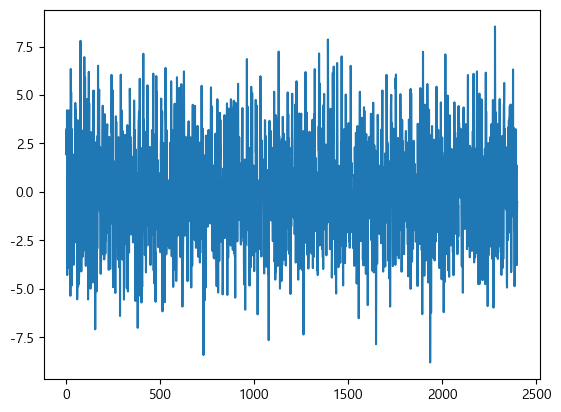

In [49]:
from simul240709_2 import *
N=100
arima_lst2000_2 = [] 
arima_score2000_2= [] 
arima_time2000_2= [] 
#model_data = [split_train_test([random_simul_yt[i].round(3)],horizon,lookback ) for i in range(len(random_simul_yt))]

for i in range(N):
    #y_test= random_simul_yt[i][-24:].round(3)
    train_ =np.array(train)[:,72+24*0:][i]
    time1 = time.time()
    model_arima = auto_arima(train_, seasonal=True, trace=True)
    time2 = time.time()  
    
    
    
    pred = model_arima.predict(24)
    
    me1= mean_squared_error(y_test_[i],pred.flatten())
    me2=mean_absolute_error(y_test_[i],pred.flatten())
    me3=mean_absolute_percentage_error(y_test_[i],pred.flatten())
    
    arima_lst2000_2.append(pred.flatten())
    arima_score2000_2.append([me1,me2,me3])
    arima_time2000_2.append(time2-time1)
    
    
arima_lst1000_2 = [] 
arima_score1000_2= [] 
arima_time1000_2= [] 
#model_data = [split_train_test([random_simul_yt[i].round(3)],horizon,lookback ) for i in range(len(random_simul_yt))]

for i in range(N):
    #y_test= random_simul_yt[i][-24:].round(3)
    train_ =np.array(train)[:,72+24*1000:][i]
    time1 = time.time()
    model_arima = auto_arima(train_, seasonal=True, trace=True)
    time2 = time.time()  
    
    
    
    pred = model_arima.predict(24)
    
    me1= mean_squared_error(y_test_[i],pred.flatten())
    me2=mean_absolute_error(y_test_[i],pred.flatten())
    me3=mean_absolute_percentage_error(y_test_[i],pred.flatten())
    
    arima_lst1000_2.append(pred.flatten())
    arima_score1000_2.append([me1,me2,me3])
    arima_time1000_2.append(time2-time1)
    
arima_lst500_2 = [] 
arima_score500_2= [] 
arima_time500_2= [] 
#model_data = [split_train_test([random_simul_yt[i].round(3)],horizon,lookback ) for i in range(len(random_simul_yt))]

for i in range(N):
    #y_test= random_simul_yt[i][-24:].round(3)
    train_ =np.array(train)[:,72+24*1500:][i]
    time1 = time.time()
    model_arima = auto_arima(train_, seasonal=True, trace=True)
    time2 = time.time()  
    
    
    
    pred = model_arima.predict(24)
    
    me1= mean_squared_error(y_test_[i],pred.flatten())
    me2=mean_absolute_error(y_test_[i],pred.flatten())
    me3=mean_absolute_percentage_error(y_test_[i],pred.flatten())
    
    arima_lst500_2.append(pred.flatten())
    arima_score500_2.append([me1,me2,me3])
    arima_time500_2.append(time2-time1)

generated data : ###########################################fin
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=117092.627, Time=9.46 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=190352.003, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=150810.408, Time=1.18 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=150707.250, Time=3.83 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=190350.194, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=125258.076, Time=10.25 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=124030.723, Time=5.24 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=102615.959, Time=29.03 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=122255.049, Time=19.79 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=102508.914, Time=46.63 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=118471.939, Time=11.66 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=85197.761, Time=55.76 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=106244.975, Time=49.27 sec
 AR

 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=53.42 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=102994.202, Time=16.85 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=117271.215, Time=4.12 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=122699.262, Time=9.65 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=24.83 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=100438.387, Time=18.43 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=113045.969, Time=5.27 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=24.52 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=23.65 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=107872.193, Time=10.04 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=78675.388, Time=25.24 sec
 ARIMA(5,0,4)(0,0,0)[0]             : AIC=inf, Time=30.25 sec
 ARIMA(4,0,5)(0,0,0)[0]             : AIC=inf, Time=34.54 sec
 ARIMA(3,0,5)(0,0,0)[0]             : AIC=105786.266, Time=31.03 sec
 ARIMA(5,0,3)(0,0,0)[0]             : AIC=inf, Time=27.47 sec
 ARIMA(5,0,5)(0,0,

 ARIMA(4,0,2)(0,0,0)[0]             : AIC=101446.226, Time=24.27 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=105619.475, Time=17.41 sec
 ARIMA(5,0,3)(0,0,0)[0]             : AIC=inf, Time=29.38 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=117922.746, Time=5.58 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=28.30 sec

Best model:  ARIMA(5,0,2)(0,0,0)[0]          
Total fit time: 484.689 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=117037.122, Time=8.32 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=190357.353, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=150675.309, Time=1.18 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=150626.931, Time=3.82 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=190355.464, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=125084.150, Time=9.78 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=123746.621, Time=5.27 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=102361.005, Time=30.15 sec
 AR

 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=112910.852, Time=10.54 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=50.13 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=50.71 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=107727.513, Time=21.23 sec
 ARIMA(4,0,4)(0,0,0)[0] intercept   : AIC=78416.499, Time=52.26 sec
 ARIMA(5,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=61.10 sec
 ARIMA(4,0,5)(0,0,0)[0] intercept   : AIC=110320.974, Time=54.99 sec
 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=59.09 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=60.08 sec
 ARIMA(5,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=66.68 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=78332.772, Time=27.69 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=24.60 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=23.71 sec
 ARIMA(5,0,4)(0,0,0)[0]             : AIC=inf, Time=33.24 sec
 ARIMA(4,0,5)(0,0,0)[0]             : AIC=inf, Time=39.21 sec
 ARIMA(3,0,3)(0,0,0)[0]             :

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=116815.550, Time=8.99 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=190279.848, Time=0.45 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=150743.414, Time=1.20 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=150482.385, Time=3.85 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=190277.848, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=124892.825, Time=10.35 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=123582.425, Time=5.28 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=102326.211, Time=31.22 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=121742.908, Time=22.64 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=101127.571, Time=44.89 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=118024.150, Time=11.12 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=85050.272, Time=54.14 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=105643.531, Time=45.86 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=58.59 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, T

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=125640.543, Time=9.31 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=124314.367, Time=5.22 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=103053.425, Time=36.72 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=122543.283, Time=19.83 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=102803.108, Time=45.47 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=118830.185, Time=17.61 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=86295.131, Time=54.81 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=107241.080, Time=45.31 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=62.59 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=56.89 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=86219.148, Time=25.64 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=102788.895, Time=21.49 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=106595.298, Time=21.12 sec
 ARIMA(5,0,3)(0,0,0)[0]             : AIC=inf, Time=29.98 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=118828.192, Time=

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=151152.036, Time=3.81 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=190527.529, Time=0.24 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=125500.065, Time=13.16 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=124448.006, Time=5.24 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=102990.279, Time=28.44 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=125181.223, Time=20.00 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=48.82 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=42.16 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=113049.311, Time=11.07 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=118677.708, Time=11.11 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=54.44 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=102988.278, Time=13.35 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=117165.397, Time=4.13 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=125179.244, Time=8.67 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=23.82 se

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=125084.413, Time=10.20 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=124023.768, Time=5.23 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=102512.846, Time=26.18 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=122230.261, Time=20.92 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=48.03 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=39.31 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=112527.506, Time=11.73 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=118256.758, Time=11.10 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=52.66 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=102510.848, Time=11.75 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=116906.360, Time=4.32 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=122228.264, Time=9.63 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=22.56 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=19.20 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=124021.773, Time=2.36 sec
 ARI

 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=102553.972, Time=31.87 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=122242.745, Time=18.43 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=101348.357, Time=44.95 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=118589.303, Time=11.12 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=86136.467, Time=51.76 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=106374.793, Time=48.55 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=57.75 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=49.68 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=85468.360, Time=26.80 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=101519.630, Time=21.44 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=106363.731, Time=20.85 sec
 ARIMA(5,0,3)(0,0,0)[0]             : AIC=inf, Time=30.21 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=118587.339, Time=8.36 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=24.13 sec

Best model:  ARIMA(5,0,2)(0,0,0)[0]          
Total fit time: 48

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=117091.847, Time=9.33 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=190482.477, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=150984.717, Time=1.18 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=150774.161, Time=3.81 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=190480.477, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=125360.399, Time=8.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=124040.921, Time=5.23 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=102743.032, Time=38.69 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=122222.956, Time=20.31 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=48.61 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=100441.392, Time=46.68 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=112756.109, Time=10.51 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=47.50 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=46.21 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=107572.378, Time=22.

C:\Users\default.DESKTOP-2ISHQBS\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(5,0,5)(0,0,0)[0]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\default.DESKTOP-2ISHQBS\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\default.DESKTOP-2ISHQBS\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\default.DESKTOP-2ISHQBS\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\default.DESKTOP-2ISHQBS\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "C:\Users\default.DESKTOP-2ISHQBS\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlem

 ARIMA(5,0,5)(0,0,0)[0]             : AIC=inf, Time=nan sec

Best model:  ARIMA(4,0,4)(0,0,0)[0]          
Total fit time: 909.006 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=116934.526, Time=9.47 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=190400.219, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=150876.241, Time=1.19 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=150626.493, Time=3.81 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=190398.339, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=125150.903, Time=9.32 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=123812.794, Time=5.28 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=102470.783, Time=31.22 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=121988.102, Time=20.29 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=47.95 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=100058.249, Time=40.67 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=112459.883, Time=11.70 sec
 ARI

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=117217.605, Time=8.93 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=190553.874, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=150947.318, Time=1.19 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=150893.850, Time=3.83 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=190551.954, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=125265.229, Time=11.48 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=124040.167, Time=5.29 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=102801.782, Time=30.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=122245.587, Time=19.45 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=52.37 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=100156.493, Time=41.07 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=112695.008, Time=11.19 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=55.16 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=49.18 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=107651.412, Time=20

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=117319.862, Time=8.91 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=190359.062, Time=0.43 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=150845.362, Time=1.20 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=150624.101, Time=3.81 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=190357.116, Time=0.24 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=125415.427, Time=8.97 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=124030.169, Time=5.25 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=102645.598, Time=37.08 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=122254.068, Time=17.85 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=52.51 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=99992.534, Time=41.28 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=112704.064, Time=11.03 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=69.88 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=54.66 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=107582.695, Time=19.9

 ARIMA(5,0,3)(0,0,0)[0]             : AIC=inf, Time=29.30 sec
 ARIMA(5,0,5)(0,0,0)[0]             : AIC=inf, Time=41.01 sec

Best model:  ARIMA(4,0,4)(0,0,0)[0]          
Total fit time: 977.723 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=117417.764, Time=8.81 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=190538.762, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=151084.795, Time=1.20 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=151039.361, Time=3.82 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=190536.764, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=125647.247, Time=9.30 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=124466.454, Time=5.26 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=103066.740, Time=30.75 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=122721.328, Time=22.83 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=102739.911, Time=48.13 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=118867.104, Time=11.75 sec
 A

 ARIMA(4,0,1)(0,0,0)[0]             : AIC=118378.233, Time=5.26 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=24.45 sec

Best model:  ARIMA(5,0,2)(0,0,0)[0]          
Total fit time: 491.381 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=117900.775, Time=8.32 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=190481.343, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=150940.638, Time=1.19 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=151103.028, Time=3.84 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=190479.349, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=125814.158, Time=10.21 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=124796.276, Time=4.82 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=103384.828, Time=35.40 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=125527.086, Time=6.84 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=50.82 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=100951.700, Time=38.01 sec
 AR

 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=102221.174, Time=50.88 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=118392.722, Time=17.10 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=85591.222, Time=59.15 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=105998.735, Time=51.66 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=57.78 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=52.65 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=86186.120, Time=28.12 sec

Best model:  ARIMA(5,0,2)(0,0,0)[0] intercept
Total fit time: 397.094 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=117027.845, Time=8.36 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=190505.027, Time=0.43 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=150848.001, Time=1.21 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=150751.867, Time=3.80 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=190503.029, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=125164.130, Time=12.25 sec
 A

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=123557.328, Time=5.28 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=102239.501, Time=31.33 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=124435.755, Time=19.56 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=101336.795, Time=48.61 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=117855.223, Time=11.15 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=85240.331, Time=55.84 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=105533.258, Time=48.85 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=54.91 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=48.83 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=84569.163, Time=27.22 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=101322.830, Time=23.37 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=105533.384, Time=19.38 sec
 ARIMA(5,0,3)(0,0,0)[0]             : AIC=inf, Time=28.53 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=117853.238, Time=7.79 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=24.77 s

 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=122543.428, Time=19.33 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=102877.278, Time=49.96 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=118714.037, Time=10.99 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=86075.572, Time=60.57 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=106449.265, Time=48.74 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=59.17 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=51.46 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=85178.076, Time=27.07 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=102873.095, Time=23.07 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=106447.894, Time=20.43 sec
 ARIMA(5,0,3)(0,0,0)[0]             : AIC=inf, Time=26.15 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=118712.048, Time=5.26 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=29.46 sec

Best model:  ARIMA(5,0,2)(0,0,0)[0]          
Total fit time: 494.337 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2

 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=51.04 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=102597.924, Time=15.30 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=116811.686, Time=4.13 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=122114.665, Time=8.05 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=24.14 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=18.19 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=123921.514, Time=2.36 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=112575.067, Time=5.28 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=118281.584, Time=5.54 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=27.26 sec

Best model:  ARIMA(3,0,2)(0,0,0)[0]          
Total fit time: 347.069 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=116949.635, Time=9.38 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=190199.719, Time=0.43 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=150817.377, Time=1.17 sec
 ARIMA(0,0,1)(0,0

 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=190431.682, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=150829.407, Time=1.20 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=150618.678, Time=3.80 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=190429.730, Time=0.24 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=125108.744, Time=9.41 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=123744.917, Time=5.23 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=102621.811, Time=31.31 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=121922.013, Time=20.33 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=102057.751, Time=50.04 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=118241.845, Time=11.69 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=85542.315, Time=56.14 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=105950.496, Time=47.32 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=65.48 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=80.62 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=85743.185, Ti

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=75231.445, Time=1.92 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=95030.690, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=62451.140, Time=5.80 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=61854.945, Time=2.64 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=51218.249, Time=20.95 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=60971.635, Time=12.31 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=51010.752, Time=25.18 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=59076.297, Time=5.86 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=42843.797, Time=27.20 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=52929.355, Time=23.58 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=31.56 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=48919.298, Time=9.82 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=42342.613, Time=14.25 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=51002.264, Time=12.34 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=52926.946, Time=9.

 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=23.63 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=53957.426, Time=12.97 sec
 ARIMA(4,0,4)(0,0,0)[0] intercept   : AIC=39354.633, Time=29.32 sec
 ARIMA(5,0,4)(0,0,0)[0] intercept   : AIC=51221.415, Time=31.86 sec
 ARIMA(4,0,5)(0,0,0)[0] intercept   : AIC=55223.392, Time=29.21 sec
 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=29.89 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=32.84 sec
 ARIMA(5,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=37.30 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=39359.529, Time=14.34 sec

Best model:  ARIMA(4,0,4)(0,0,0)[0] intercept
Total fit time: 361.194 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=58443.484, Time=4.78 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=95067.725, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=75293.221, Time=0.61 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=75227.063, Time=1.92 sec
 ARIMA(0,0,0)(0,0,0)[0

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=58303.314, Time=4.49 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=95028.542, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=75281.134, Time=0.61 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=75177.041, Time=1.93 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=95026.548, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=62316.314, Time=5.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=61698.090, Time=2.66 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=51113.375, Time=22.73 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=60776.732, Time=10.25 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=50797.407, Time=23.69 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=58897.252, Time=5.85 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=42322.130, Time=26.66 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=52741.213, Time=24.11 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=29.76 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=23.07 sec


 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=50737.801, Time=26.78 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=59018.348, Time=5.88 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=42938.532, Time=27.48 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=52884.656, Time=23.68 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=28.92 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=25.69 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=42885.519, Time=12.55 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=50739.238, Time=13.14 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=52887.532, Time=9.41 sec
 ARIMA(5,0,3)(0,0,0)[0]             : AIC=inf, Time=14.69 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=59016.372, Time=2.79 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=17.02 sec

Best model:  ARIMA(5,0,2)(0,0,0)[0]          
Total fit time: 245.935 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=58628.357, Time=4.45 sec
 ARIMA(0,0,0)(0,0,0)[0

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=61848.939, Time=2.65 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=51070.690, Time=15.43 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=60970.570, Time=12.26 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=24.29 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=49817.696, Time=20.40 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=56061.407, Time=5.87 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=28.63 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=25.41 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=53467.545, Time=10.01 sec
 ARIMA(4,0,4)(0,0,0)[0] intercept   : AIC=38795.055, Time=29.92 sec
 ARIMA(5,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=36.50 sec
 ARIMA(4,0,5)(0,0,0)[0] intercept   : AIC=54729.435, Time=28.18 sec
 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=28.47 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=38.02 sec
 ARIMA(5,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=38.26 sec
 ARIMA(4,0,4)(0,0,0)[0] 

 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=53103.274, Time=23.52 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=29.61 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=24.94 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=42825.112, Time=12.87 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=12.48 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=53099.246, Time=9.77 sec
 ARIMA(5,0,3)(0,0,0)[0]             : AIC=inf, Time=15.00 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=59266.988, Time=2.65 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=14.00 sec

Best model:  ARIMA(5,0,2)(0,0,0)[0]          
Total fit time: 244.969 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=58810.910, Time=12.78 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=95060.648, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=75420.733, Time=0.61 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=75352.498, Time=1.92 sec
 ARIMA(0,0,0)(0,0,0)[0]      

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=62337.669, Time=5.86 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=61789.660, Time=2.66 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=51151.939, Time=15.02 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=60865.351, Time=11.01 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=50823.734, Time=24.24 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=58934.362, Time=5.88 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=42224.791, Time=29.51 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=52761.256, Time=23.33 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=31.09 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=24.97 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=42304.580, Time=13.94 sec

Best model:  ARIMA(5,0,2)(0,0,0)[0] intercept
Total fit time: 194.878 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=58305.500, Time=4.47 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=95052.858, Time=0.22 sec
 ARIMA(1,0,

 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=56283.924, Time=5.31 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=22.83 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=26.25 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=53622.582, Time=11.30 sec
 ARIMA(4,0,4)(0,0,0)[0] intercept   : AIC=40621.520, Time=25.34 sec
 ARIMA(5,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=30.54 sec
 ARIMA(4,0,5)(0,0,0)[0] intercept   : AIC=54976.237, Time=28.89 sec
 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=52984.789, Time=29.56 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=30.25 sec
 ARIMA(5,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=39.44 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=39138.960, Time=12.53 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=11.80 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=15.26 sec
 ARIMA(5,0,4)(0,0,0)[0]             : AIC=inf, Time=17.93 sec
 ARIMA(4,0,5)(0,0,0)[0]             : AIC=inf, Time=16.95 sec
 ARIMA(3,0,3)(0,0,0)[0]            

 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=95052.710, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=75266.065, Time=0.72 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=75276.859, Time=1.92 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=95050.725, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=62304.614, Time=5.84 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=61770.023, Time=2.65 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=50831.074, Time=14.95 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=60830.548, Time=11.22 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=24.03 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=19.66 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=55941.243, Time=5.88 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=58846.818, Time=5.91 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=24.41 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=50829.078, Time=9.05 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=58230.709, Time=2.18 sec
 ARIMA(3

 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=12.37 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=9.58 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=61778.342, Time=1.20 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=56103.073, Time=2.96 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=59045.432, Time=2.65 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=15.43 sec

Best model:  ARIMA(3,0,2)(0,0,0)[0]          
Total fit time: 183.120 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=58525.921, Time=4.23 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=95090.562, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=75368.942, Time=0.61 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=75248.050, Time=1.93 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=95088.638, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=62594.177, Time=5.54 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=61814.680, Time=2.66 sec
 ARIMA(3,0,2)(0,0,0)[0]

 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=60758.642, Time=8.48 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=50859.895, Time=25.13 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=58946.558, Time=5.88 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=43389.845, Time=29.03 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=52773.537, Time=26.66 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=30.69 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=27.29 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=43431.023, Time=12.93 sec

Best model:  ARIMA(5,0,2)(0,0,0)[0] intercept
Total fit time: 196.469 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=58508.266, Time=4.50 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=95044.819, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=75371.891, Time=0.60 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=75204.208, Time=1.92 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=95042.822, Time=0.12 sec
 ARIMA(1,0,2)

 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=28.91 sec
 ARIMA(5,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=35.36 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=39113.334, Time=13.38 sec

Best model:  ARIMA(4,0,4)(0,0,0)[0] intercept
Total fit time: 353.997 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=58124.841, Time=4.20 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=95023.373, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=75209.632, Time=0.61 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=75108.485, Time=1.93 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=95021.374, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=62208.926, Time=5.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=61530.563, Time=2.66 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=50979.499, Time=14.85 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=60594.549, Time=9.23 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=25.37 sec
 ARIMA(3,0,3)(0,0,0)

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=62528.961, Time=6.19 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=61973.771, Time=2.67 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=51230.713, Time=15.80 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=62381.546, Time=3.28 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=24.80 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=20.13 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=56185.253, Time=5.57 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=59071.189, Time=5.60 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=28.35 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=51228.713, Time=7.45 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=58322.379, Time=2.06 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=62379.546, Time=1.50 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=11.97 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=9.76 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=61971.771, Time=1.18 sec
 ARIMA(2,0,3)(0,0,0)

 ARIMA(4,0,5)(0,0,0)[0] intercept   : AIC=55405.695, Time=30.57 sec
 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=53055.332, Time=28.31 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=31.53 sec
 ARIMA(5,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=34.74 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=39586.204, Time=13.99 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=12.54 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=13.18 sec
 ARIMA(5,0,4)(0,0,0)[0]             : AIC=inf, Time=16.69 sec
 ARIMA(4,0,5)(0,0,0)[0]             : AIC=inf, Time=18.83 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=50419.735, Time=9.94 sec
 ARIMA(3,0,5)(0,0,0)[0]             : AIC=53048.119, Time=14.55 sec
 ARIMA(5,0,3)(0,0,0)[0]             : AIC=inf, Time=15.25 sec
 ARIMA(5,0,5)(0,0,0)[0]             : AIC=inf, Time=23.64 sec

Best model:  ARIMA(4,0,4)(0,0,0)[0]          
Total fit time: 482.761 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=5

 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=52702.720, Time=22.49 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=28.91 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=27.19 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=42441.582, Time=12.54 sec

Best model:  ARIMA(5,0,2)(0,0,0)[0] intercept
Total fit time: 190.486 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=58819.150, Time=4.55 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=95090.516, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=75348.806, Time=0.60 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=75359.990, Time=1.92 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=95088.533, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=62792.971, Time=5.55 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=62050.309, Time=2.66 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=51448.976, Time=16.10 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=61189.909, Time=8.75 sec
 ARIMA(4,0,2)(

 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=23.85 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=53711.872, Time=12.11 sec
 ARIMA(4,0,4)(0,0,0)[0] intercept   : AIC=39367.294, Time=29.47 sec
 ARIMA(5,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=32.93 sec
 ARIMA(4,0,5)(0,0,0)[0] intercept   : AIC=55120.515, Time=29.66 sec
 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=53176.472, Time=30.14 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=28.38 sec
 ARIMA(5,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=34.59 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=39383.420, Time=14.00 sec

Best model:  ARIMA(4,0,4)(0,0,0)[0] intercept
Total fit time: 353.847 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=58616.792, Time=4.50 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=95148.818, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=75425.834, Time=0.61 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=75308.503, Time=1.93 sec
 ARIMA(0,0,0)(0,0,0)[0

 ARIMA(5,0,3)(0,0,0)[0]             : AIC=inf, Time=15.36 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=59075.221, Time=2.80 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=13.74 sec

Best model:  ARIMA(5,0,2)(0,0,0)[0]          
Total fit time: 250.836 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=58613.975, Time=4.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=95078.174, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=75268.839, Time=0.61 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=75350.965, Time=1.93 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=95076.185, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=62662.653, Time=4.97 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=62079.081, Time=2.65 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=51441.297, Time=15.46 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=61239.014, Time=11.74 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=27.86 sec
 ARIMA(3,0,3)(0,0,0)

 ARIMA(5,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=33.94 sec
 ARIMA(4,0,5)(0,0,0)[0] intercept   : AIC=55005.260, Time=28.78 sec
 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=32.01 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=34.44 sec
 ARIMA(5,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=35.53 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=40361.068, Time=14.65 sec

Best model:  ARIMA(4,0,4)(0,0,0)[0] intercept
Total fit time: 361.846 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=58502.028, Time=4.72 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=95130.886, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=75373.340, Time=0.60 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=75417.405, Time=1.92 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=95128.925, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=62493.729, Time=4.68 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=61990.726, Time=2.67 sec
 ARIMA(3,0,2)(0,0,0)[0] i

 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=61139.569, Time=11.51 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=24.53 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=21.59 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=56306.547, Time=5.90 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=59211.048, Time=4.97 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=28.50 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=51306.410, Time=7.11 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=58474.115, Time=2.19 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=61137.620, Time=5.55 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=51133.273, Time=11.50 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=59209.089, Time=2.38 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=42706.065, Time=14.08 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=53162.288, Time=9.09 sec
 ARIMA(5,0,3)(0,0,0)[0]             : AIC=inf, Time=14.93 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=13.51 sec
 ARIMA(5,0,2)(0,0

 ARIMA(5,0,1)(0,0,0)[0]             : AIC=26551.135, Time=5.71 sec
 ARIMA(5,0,3)(0,0,0)[0]             : AIC=inf, Time=8.25 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=29553.119, Time=1.36 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=3.51 sec

Best model:  ARIMA(5,0,2)(0,0,0)[0]          
Total fit time: 115.048 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=29100.133, Time=2.30 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=47408.500, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=37569.015, Time=0.37 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=37521.671, Time=0.99 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=47406.625, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=31184.506, Time=3.50 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=30887.347, Time=1.37 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=25506.066, Time=8.51 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=30437.605, Time=5.26 sec
 ARIMA(4,0,2)(0,0,0

 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=25637.758, Time=12.55 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=9.80 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=28083.187, Time=2.70 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=29611.508, Time=2.54 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=13.67 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=25606.348, Time=3.35 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=29265.345, Time=1.04 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=30542.373, Time=2.15 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=25639.004, Time=6.17 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=4.72 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=30973.458, Time=0.61 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=28081.191, Time=1.29 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=29609.510, Time=1.21 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=10.12 sec

Best model:  ARIMA(3,0,2)(0,0,0)[0]          
Total fit time: 92.409 seconds
Perfo

 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=9.43 sec

Best model:  ARIMA(5,0,2)(0,0,0)[0]          
Total fit time: 132.010 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=29254.234, Time=2.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=47398.404, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=37546.506, Time=0.37 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=37514.986, Time=0.98 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=47396.719, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=31234.779, Time=2.52 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=30914.207, Time=1.35 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=25605.017, Time=8.64 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=30482.011, Time=5.14 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=25569.774, Time=11.79 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=29570.123, Time=2.68 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=21246.332, Time=14.53 sec
 ARIMA(5,0,

 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=26786.912, Time=5.65 sec
 ARIMA(4,0,4)(0,0,0)[0] intercept   : AIC=19630.444, Time=15.00 sec
 ARIMA(5,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=17.02 sec
 ARIMA(4,0,5)(0,0,0)[0] intercept   : AIC=27453.966, Time=15.05 sec
 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=15.73 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=16.90 sec
 ARIMA(5,0,5)(0,0,0)[0] intercept   : AIC=21932.353, Time=23.44 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=19626.319, Time=6.99 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=6.11 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=6.83 sec
 ARIMA(5,0,4)(0,0,0)[0]             : AIC=inf, Time=10.66 sec
 ARIMA(4,0,5)(0,0,0)[0]             : AIC=inf, Time=8.33 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=24932.516, Time=5.19 sec
 ARIMA(3,0,5)(0,0,0)[0]             : AIC=26252.267, Time=7.58 sec
 ARIMA(5,0,3)(0,0,0)[0]             : AIC=inf, Time=9.35 sec
 ARIMA(5,0,5)(0,0,0)[0]             

 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=10.66 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=28127.050, Time=2.71 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=29540.384, Time=3.15 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=12.19 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=25679.285, Time=4.50 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=29264.402, Time=1.76 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=30425.471, Time=2.04 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=5.98 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=5.20 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=30879.805, Time=0.61 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=28125.243, Time=1.29 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=29538.464, Time=1.50 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=7.64 sec

Best model:  ARIMA(3,0,2)(0,0,0)[0]          
Total fit time: 94.830 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   

 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=17.26 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=15.20 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=21301.558, Time=6.91 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=25632.339, Time=6.54 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=26482.170, Time=5.19 sec
 ARIMA(5,0,3)(0,0,0)[0]             : AIC=inf, Time=8.40 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=29609.095, Time=1.21 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=9.05 sec

Best model:  ARIMA(5,0,2)(0,0,0)[0]          
Total fit time: 131.577 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=29155.507, Time=2.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=47391.007, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=37593.729, Time=0.48 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=37538.097, Time=0.98 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=47389.008, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] inter

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=29143.927, Time=2.27 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=47407.832, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=37515.530, Time=0.37 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=37522.633, Time=0.98 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=47405.862, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=31227.643, Time=2.50 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=30854.832, Time=1.36 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=25611.164, Time=8.36 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=30421.735, Time=5.02 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=13.02 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=24917.605, Time=9.90 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=27972.167, Time=3.18 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=25.20 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=12.35 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=26839.693, Time=5.24 sec
 ARIMA(4,0

 ARIMA(4,0,1)(0,0,0)[0]             : AIC=29578.975, Time=1.28 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=7.53 sec

Best model:  ARIMA(3,0,2)(0,0,0)[0]          
Total fit time: 90.787 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=29276.255, Time=2.29 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=47431.914, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=37627.271, Time=0.42 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=37529.572, Time=0.98 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=47429.928, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=31268.937, Time=2.51 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=30921.969, Time=1.34 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=25593.925, Time=7.29 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=30474.082, Time=4.86 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=12.69 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=24973.744, Time=10.10 sec
 ARIMA(2,0,3)(0,0,

C:\Users\default.DESKTOP-2ISHQBS\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(5,0,3)(0,0,0)[0] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\default.DESKTOP-2ISHQBS\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\default.DESKTOP-2ISHQBS\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\default.DESKTOP-2ISHQBS\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\default.DESKTOP-2ISHQBS\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "C:\Users\default.DESKTOP-2ISHQBS\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlem

 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=12.06 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=21499.783, Time=6.95 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=25502.609, Time=5.64 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=26538.562, Time=4.96 sec
 ARIMA(5,0,3)(0,0,0)[0]             : AIC=inf, Time=8.67 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=29585.757, Time=1.43 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=5.78 sec

Best model:  ARIMA(5,0,2)(0,0,0)[0]          
Total fit time: 115.035 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=29072.034, Time=2.33 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=47358.789, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=37512.431, Time=0.37 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=37415.285, Time=0.99 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=47356.789, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] interce

 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=25664.145, Time=12.93 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=25082.585, Time=10.70 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=28239.001, Time=2.87 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=13.41 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=12.52 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=26883.879, Time=6.00 sec
 ARIMA(4,0,4)(0,0,0)[0] intercept   : AIC=19660.093, Time=14.99 sec
 ARIMA(5,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=15.77 sec
 ARIMA(4,0,5)(0,0,0)[0] intercept   : AIC=27621.731, Time=15.66 sec
 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=16.03 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=16.31 sec
 ARIMA(5,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=20.41 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=19639.603, Time=7.33 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=5.96 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=6.76 sec
 ARIMA(5,0,4)(0,0,0)[0]          

 ARIMA(5,0,2)(0,0,0)[0]             : AIC=21288.906, Time=6.61 sec

Best model:  ARIMA(5,0,2)(0,0,0)[0] intercept
Total fit time: 99.500 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=29277.076, Time=2.29 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=47360.973, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=37599.215, Time=0.36 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=37564.105, Time=0.98 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=47358.977, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=31344.170, Time=2.30 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=31025.233, Time=1.35 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=25662.835, Time=8.52 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=30605.537, Time=5.00 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=12.69 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=10.58 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=28148.391, Time=2.86 sec
 ARIMA(4,0,1)(0,0,

 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=31071.587, Time=1.68 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=12.56 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=24862.831, Time=10.27 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=27957.760, Time=3.03 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=13.70 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=13.09 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=26646.324, Time=5.63 sec
 ARIMA(4,0,4)(0,0,0)[0] intercept   : AIC=19412.107, Time=14.11 sec
 ARIMA(5,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=16.05 sec
 ARIMA(4,0,5)(0,0,0)[0] intercept   : AIC=27311.973, Time=14.33 sec
 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=26152.776, Time=14.73 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=14.94 sec
 ARIMA(5,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=19.47 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=19393.554, Time=7.18 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=6.13 sec
 ARIMA(4,0,3)(0,0,0)[0]    

 ARIMA(5,0,3)(0,0,0)[0]             : AIC=inf, Time=8.75 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=29304.698, Time=1.42 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=7.16 sec

Best model:  ARIMA(5,0,2)(0,0,0)[0]          
Total fit time: 127.827 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=29116.796, Time=2.30 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=47399.917, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=37595.363, Time=0.37 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=37583.449, Time=0.98 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=47397.920, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=31176.198, Time=3.95 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=30893.423, Time=1.36 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=25507.305, Time=10.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=30431.400, Time=5.66 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=13.05 sec
 ARIMA(3,0,3)(0,0,0)[0]

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=37573.468, Time=0.37 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=37625.896, Time=0.99 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=47388.216, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=31327.540, Time=2.18 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=31066.585, Time=1.24 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=25685.319, Time=9.25 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=31235.402, Time=4.63 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=25580.304, Time=11.52 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=29695.241, Time=2.69 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=21636.182, Time=14.48 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=26681.221, Time=11.76 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=15.15 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=14.15 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=21868.225, Time=7.40 sec

Best model:  ARIMA(5,0,2)(0,0,0)[0] intercept
Total fit time: 98.012

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=30961.130, Time=2.74 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=30620.893, Time=1.35 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=25384.417, Time=7.63 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=30128.788, Time=4.59 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=25038.362, Time=13.88 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=29260.962, Time=3.01 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=21411.563, Time=14.53 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=26233.578, Time=12.31 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=16.01 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=15.46 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=21193.336, Time=6.85 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=25074.700, Time=6.45 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=26232.657, Time=4.50 sec
 ARIMA(5,0,3)(0,0,0)[0]             : AIC=inf, Time=8.14 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=29258.975, Time=1.36 sec
 ARIMA(4

 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=29390.518, Time=2.87 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=21217.781, Time=13.54 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=26326.947, Time=11.94 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=16.00 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=12.83 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=21152.297, Time=6.42 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=25344.762, Time=6.31 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=26320.709, Time=4.94 sec
 ARIMA(5,0,3)(0,0,0)[0]             : AIC=inf, Time=8.32 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=29388.559, Time=1.36 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=6.84 sec

Best model:  ARIMA(5,0,2)(0,0,0)[0]          
Total fit time: 124.852 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=29098.817, Time=2.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=47433.845, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] int

 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=11.78 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=13.57 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=26865.248, Time=5.42 sec
 ARIMA(4,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=16.75 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=24968.331, Time=4.81 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=28123.606, Time=1.49 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=25575.596, Time=3.60 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=6.98 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=6.09 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=29189.127, Time=1.04 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=26863.248, Time=2.57 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=25498.668, Time=6.04 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=19817.157, Time=8.73 sec
 ARIMA(5,0,4)(0,0,0)[0]             : AIC=25507.957, Time=7.71 sec
 ARIMA(4,0,5)(0,0,0)[0]             : AIC=inf, Time=9.43 sec
 ARIMA(3,0,5)(0,0,0)[0]     

 ARIMA(5,0,5)(0,0,0)[0]             : AIC=inf, Time=12.84 sec

Best model:  ARIMA(4,0,4)(0,0,0)[0]          
Total fit time: 253.086 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=29077.659, Time=2.30 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=47399.363, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=37537.731, Time=0.32 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=37587.374, Time=0.99 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=47397.414, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=31186.857, Time=3.84 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=30918.447, Time=1.35 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=25618.637, Time=7.73 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=31116.697, Time=1.38 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=12.47 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=24967.054, Time=10.44 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=28078.189, Time=3.04 sec
 ARIMA(4,0,3)(0,

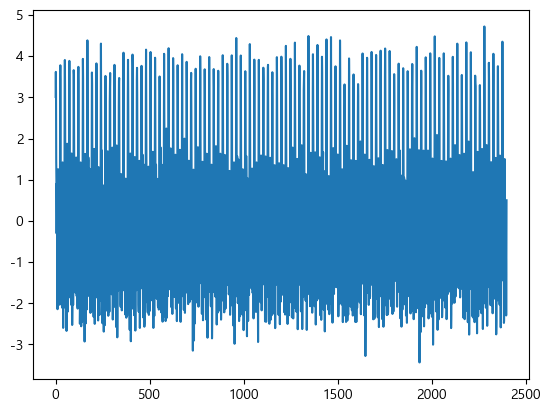

In [50]:
from simul240709_1_3 import *
N=100
arima_lst2000_1_3 = [] 
arima_score2000_1_3= [] 
arima_time2000_1_3= [] 
#model_data = [split_train_test([random_simul_yt[i].round(3)],horizon,lookback ) for i in range(len(random_simul_yt))]

for i in range(N):
    #y_test= random_simul_yt[i][-24:].round(3)
    train_ =np.array(train)[:,72+24*0:][i]
    time1 = time.time()
    model_arima = auto_arima(train_, seasonal=True, trace=True)
    time2 = time.time()  
    
    
    
    pred = model_arima.predict(24)
    
    me1= mean_squared_error(y_test_[i],pred.flatten())
    me2=mean_absolute_error(y_test_[i],pred.flatten())
    me3=mean_absolute_percentage_error(y_test_[i],pred.flatten())
    
    arima_lst2000_1_3.append(pred.flatten())
    arima_score2000_1_3.append([me1,me2,me3])
    arima_time2000_1_3.append(time2-time1)
    
    
arima_lst1000_1_3 = [] 
arima_score1000_1_3= [] 
arima_time1000_1_3= [] 
#model_data = [split_train_test([random_simul_yt[i].round(3)],horizon,lookback ) for i in range(len(random_simul_yt))]

for i in range(N):
    #y_test= random_simul_yt[i][-24:].round(3)
    train_ =np.array(train)[:,72+24*1000:][i]
    time1 = time.time()
    model_arima = auto_arima(train_, seasonal=True, trace=True)
    time2 = time.time()  
    
    
    
    pred = model_arima.predict(24)
    
    me1= mean_squared_error(y_test_[i],pred.flatten())
    me2=mean_absolute_error(y_test_[i],pred.flatten())
    me3=mean_absolute_percentage_error(y_test_[i],pred.flatten())
    
    arima_lst1000_1_3.append(pred.flatten())
    arima_score1000_1_3.append([me1,me2,me3])
    arima_time1000_1_3.append(time2-time1)
    
arima_lst500_1_3 = [] 
arima_score500_1_3= [] 
arima_time500_1_3= [] 
#model_data = [split_train_test([random_simul_yt[i].round(3)],horizon,lookback ) for i in range(len(random_simul_yt))]

for i in range(N):
    #y_test= random_simul_yt[i][-24:].round(3)
    train_ =np.array(train)[:,72+24*1500:][i]
    time1 = time.time()
    model_arima = auto_arima(train_, seasonal=True, trace=True)
    time2 = time.time()  
    
    
    
    pred = model_arima.predict(24)
    
    me1= mean_squared_error(y_test_[i],pred.flatten())
    me2=mean_absolute_error(y_test_[i],pred.flatten())
    me3=mean_absolute_percentage_error(y_test_[i],pred.flatten())
    
    arima_lst500_1_3.append(pred.flatten())
    arima_score500_1_3.append([me1,me2,me3])
    arima_time500_1_3.append(time2-time1)

generated data : ###########################################fin
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=138095.500, Time=8.40 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=192417.374, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=157768.852, Time=1.19 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=160463.182, Time=3.81 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=192415.786, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=143543.158, Time=6.31 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=143230.123, Time=4.84 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=35.48 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=134652.676, Time=12.32 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=141181.194, Time=9.67 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=41.34 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=129505.636, Time=30.90 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=137382.860, Time=30.09 sec
 ARIMA(3,0,4)(0,0,

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=157944.719, Time=1.18 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=160568.682, Time=3.79 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=192548.900, Time=0.24 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=143581.386, Time=5.93 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=143303.220, Time=4.80 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=35.18 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=134854.863, Time=12.40 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=141320.094, Time=9.84 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=40.64 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=129462.897, Time=30.12 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=137484.620, Time=27.26 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=46.21 sec
 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=51.57 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=134784.389, Time=21.93 sec
 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=57.67 sec
 ARIMA

 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=192537.779, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=157877.660, Time=1.19 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=160632.043, Time=3.81 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=192535.784, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=143552.042, Time=5.93 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=143335.540, Time=4.82 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=40.86 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=134897.769, Time=12.31 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=141226.137, Time=9.23 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=48.80 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=129565.001, Time=33.01 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=137390.158, Time=24.09 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=52.99 sec
 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=49.97 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=134651.516, Time=20.47 sec


 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=16.53 sec

Best model:  ARIMA(3,0,2)(0,0,0)[0] intercept
Total fit time: 259.688 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=138404.173, Time=8.85 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=192418.593, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=157723.915, Time=0.98 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=160433.500, Time=3.80 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=192417.037, Time=0.24 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=143742.407, Time=5.99 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=143322.840, Time=4.82 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=37.58 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=134960.601, Time=20.39 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=141380.233, Time=9.81 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=44.18 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=129833.852, Time=35.18 sec
 ARIMA(1,0

 ARIMA(2,0,3)(0,0,0)[0]             : AIC=134489.634, Time=5.82 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=22.53 sec
 ARIMA(2,0,5)(0,0,0)[0]             : AIC=inf, Time=24.45 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=140952.385, Time=4.31 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=134312.776, Time=9.29 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=19.92 sec
 ARIMA(3,0,5)(0,0,0)[0]             : AIC=127743.025, Time=31.37 sec
 ARIMA(4,0,5)(0,0,0)[0]             : AIC=inf, Time=38.03 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=inf, Time=27.35 sec

Best model:  ARIMA(3,0,5)(0,0,0)[0]          
Total fit time: 574.047 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=138377.155, Time=8.35 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=192355.478, Time=0.43 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=157602.739, Time=1.18 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=160451.947, Time=3.81 sec
 ARIMA(0,0,0)(0,0,0)[0]

 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=141104.235, Time=9.74 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=42.56 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=129632.732, Time=30.11 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=137210.352, Time=27.94 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=58.27 sec
 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=46.69 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=134678.988, Time=22.04 sec
 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=58.70 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=129630.831, Time=14.53 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=137211.945, Time=9.83 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=134861.229, Time=5.83 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=27.01 sec
 ARIMA(2,0,5)(0,0,0)[0]             : AIC=inf, Time=26.36 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=141102.269, Time=4.30 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=134680.534, Time=8.72 sec
 ARIMA(3,0,3

 ARIMA(1,0,4)(0,0,0)[0]             : AIC=137803.511, Time=9.72 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=135085.241, Time=5.57 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=22.13 sec
 ARIMA(2,0,5)(0,0,0)[0]             : AIC=inf, Time=31.02 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=141607.968, Time=4.28 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=135018.173, Time=8.57 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=26.41 sec
 ARIMA(3,0,5)(0,0,0)[0]             : AIC=128351.627, Time=28.84 sec
 ARIMA(4,0,5)(0,0,0)[0]             : AIC=115078.011, Time=37.24 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=inf, Time=25.30 sec
 ARIMA(5,0,5)(0,0,0)[0]             : AIC=inf, Time=34.71 sec
 ARIMA(5,0,4)(0,0,0)[0]             : AIC=inf, Time=34.10 sec
 ARIMA(4,0,5)(0,0,0)[0] intercept   : AIC=132967.157, Time=58.90 sec

Best model:  ARIMA(4,0,5)(0,0,0)[0]          
Total fit time: 714.190 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] int

 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=58.34 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=129654.192, Time=14.50 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=137529.159, Time=9.14 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=135117.922, Time=5.56 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=21.78 sec
 ARIMA(2,0,5)(0,0,0)[0]             : AIC=inf, Time=24.35 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=141452.922, Time=4.28 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=134824.391, Time=8.65 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=21.89 sec
 ARIMA(3,0,5)(0,0,0)[0]             : AIC=128298.821, Time=29.60 sec
 ARIMA(4,0,5)(0,0,0)[0]             : AIC=inf, Time=33.57 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=inf, Time=35.00 sec

Best model:  ARIMA(3,0,5)(0,0,0)[0]          
Total fit time: 563.193 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=137834.797, Time=7.86 sec
 ARIMA(0,0,0)(0,0,0)[0] inte

 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=20.90 sec
 ARIMA(3,0,5)(0,0,0)[0]             : AIC=inf, Time=29.76 sec

Best model:  ARIMA(2,0,4)(0,0,0)[0]          
Total fit time: 520.710 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=137890.964, Time=8.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=192505.248, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=157839.675, Time=1.18 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=160692.417, Time=3.55 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=192503.263, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=143398.216, Time=6.36 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=143199.503, Time=4.83 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=36.63 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=134638.877, Time=11.77 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=141153.031, Time=9.26 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=42.17 sec
 ARIMA(2,0,4)(0,0

 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=43.93 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=129302.838, Time=30.90 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=136992.260, Time=25.94 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=46.20 sec
 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=46.59 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=134134.583, Time=24.02 sec
 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=54.90 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=129300.852, Time=14.51 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=136990.762, Time=8.88 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=134505.423, Time=5.55 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=23.14 sec
 ARIMA(2,0,5)(0,0,0)[0]             : AIC=inf, Time=23.36 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=140837.133, Time=4.32 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=134133.091, Time=9.07 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=21.70 sec
 ARIMA(3,0,5)(0,0,

 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=134518.140, Time=29.82 sec
 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=57.45 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=129315.267, Time=13.13 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=137138.561, Time=8.48 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=134676.292, Time=5.62 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=23.13 sec
 ARIMA(2,0,5)(0,0,0)[0]             : AIC=inf, Time=23.91 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=141029.600, Time=4.33 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=134517.634, Time=8.99 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=20.15 sec
 ARIMA(3,0,5)(0,0,0)[0]             : AIC=127770.226, Time=28.03 sec
 ARIMA(4,0,5)(0,0,0)[0]             : AIC=inf, Time=35.63 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=inf, Time=28.29 sec

Best model:  ARIMA(3,0,5)(0,0,0)[0]          
Total fit time: 564.152 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] int

 ARIMA(1,0,3)(0,0,0)[0]             : AIC=141317.660, Time=4.32 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=134808.114, Time=8.60 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=22.42 sec
 ARIMA(3,0,5)(0,0,0)[0]             : AIC=128161.464, Time=30.01 sec
 ARIMA(4,0,5)(0,0,0)[0]             : AIC=inf, Time=35.52 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=inf, Time=26.93 sec

Best model:  ARIMA(3,0,5)(0,0,0)[0]          
Total fit time: 586.334 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=138194.928, Time=8.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=192646.787, Time=0.43 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=157965.429, Time=1.18 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=160695.441, Time=3.81 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=192644.813, Time=0.24 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=143704.189, Time=5.95 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=143382.708, Time=4.83 sec
 ARIMA(3,0,

 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=20.71 sec
 ARIMA(3,0,5)(0,0,0)[0]             : AIC=127704.003, Time=27.52 sec
 ARIMA(4,0,5)(0,0,0)[0]             : AIC=inf, Time=33.47 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=inf, Time=29.00 sec

Best model:  ARIMA(3,0,5)(0,0,0)[0]          
Total fit time: 562.921 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=138189.447, Time=8.59 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=192520.703, Time=0.45 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=157818.095, Time=0.98 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=160692.604, Time=3.52 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=192518.725, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=143539.921, Time=5.90 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=143382.821, Time=4.82 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=124402.437, Time=35.84 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=142618.189, Time=8.50 sec
 ARIMA(4,0

 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=50.08 sec
 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=54.74 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=134371.882, Time=30.73 sec
 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=65.49 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=129293.043, Time=17.11 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=137131.171, Time=8.89 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=134218.796, Time=5.30 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=23.83 sec
 ARIMA(2,0,5)(0,0,0)[0]             : AIC=inf, Time=26.84 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=141012.071, Time=4.28 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=134369.962, Time=9.04 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=22.72 sec
 ARIMA(3,0,5)(0,0,0)[0]             : AIC=127793.454, Time=27.75 sec
 ARIMA(4,0,5)(0,0,0)[0]             : AIC=115239.905, Time=34.69 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=inf, Time=45.89 sec
 ARIMA(5,0,5)(0,0,

 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=51.26 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=134176.214, Time=22.66 sec
 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=56.70 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=129116.367, Time=12.20 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=137041.596, Time=8.56 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=134422.557, Time=5.77 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=22.93 sec
 ARIMA(2,0,5)(0,0,0)[0]             : AIC=inf, Time=28.94 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=140810.381, Time=4.33 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=134174.312, Time=9.38 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=22.18 sec
 ARIMA(3,0,5)(0,0,0)[0]             : AIC=127576.535, Time=28.36 sec
 ARIMA(4,0,5)(0,0,0)[0]             : AIC=inf, Time=37.89 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=inf, Time=28.86 sec

Best model:  ARIMA(3,0,5)(0,0,0)[0]          
Total fit time: 574.512 seconds
Performi

 ARIMA(3,0,5)(0,0,0)[0]             : AIC=128071.810, Time=28.53 sec
 ARIMA(2,0,5)(0,0,0)[0]             : AIC=inf, Time=23.13 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=31.50 sec
 ARIMA(4,0,5)(0,0,0)[0]             : AIC=inf, Time=34.14 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=129497.966, Time=12.32 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=inf, Time=24.16 sec

Best model:  ARIMA(3,0,5)(0,0,0)[0]          
Total fit time: 642.770 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=137572.736, Time=8.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=192431.126, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=157767.329, Time=1.19 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=160334.440, Time=3.81 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=192429.148, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=143313.758, Time=5.90 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=142914.265, Time=4.82 sec
 ARIMA(3,0,2)(0,

 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=20.33 sec
 ARIMA(3,0,5)(0,0,0)[0]             : AIC=127986.106, Time=29.48 sec
 ARIMA(4,0,5)(0,0,0)[0]             : AIC=115040.019, Time=36.68 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=inf, Time=26.39 sec
 ARIMA(5,0,5)(0,0,0)[0]             : AIC=inf, Time=38.03 sec
 ARIMA(5,0,4)(0,0,0)[0]             : AIC=123510.929, Time=35.03 sec
 ARIMA(4,0,5)(0,0,0)[0] intercept   : AIC=132581.771, Time=59.99 sec

Best model:  ARIMA(4,0,5)(0,0,0)[0]          
Total fit time: 701.013 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=138967.879, Time=7.94 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=192625.434, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=158047.916, Time=1.19 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=161001.487, Time=3.54 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=192623.447, Time=0.24 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=144185.569, Time=5.93 sec
 ARIMA(2

 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=57.43 sec

Best model:  ARIMA(5,0,2)(0,0,0)[0] intercept
Total fit time: 600.040 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=138092.522, Time=7.82 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=192517.163, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=157834.179, Time=1.20 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=160576.742, Time=3.80 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=192515.168, Time=0.24 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=143485.130, Time=5.96 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=143257.548, Time=4.81 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=37.11 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=134864.208, Time=11.70 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=141143.205, Time=9.20 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=45.29 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=129403.794, Time=28.55 sec
 ARIMA(1,0

 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=124408.483, Time=36.41 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=142799.201, Time=8.50 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=42.53 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=43.43 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=135113.840, Time=12.28 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=140068.506, Time=11.72 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=51.95 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=123868.871, Time=17.39 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=138341.484, Time=3.94 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=142797.204, Time=3.92 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=20.34 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=22.54 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=143592.921, Time=2.18 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=135111.843, Time=5.79 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=140066.507, Time=5.50 sec
 ARIMA

 ARIMA(4,0,5)(0,0,0)[0] intercept   : AIC=132685.709, Time=58.31 sec

Best model:  ARIMA(4,0,5)(0,0,0)[0]          
Total fit time: 702.921 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=138129.832, Time=7.40 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=192498.224, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=157812.611, Time=0.98 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=160505.606, Time=3.81 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=192496.235, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=143741.058, Time=6.36 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=143292.486, Time=4.85 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=124701.699, Time=40.61 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=142619.806, Time=9.50 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=47.04 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=41.15 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=134792.328, Time=11.69 sec
 AR

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=192386.762, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=143271.197, Time=6.38 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=142875.309, Time=4.82 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=38.34 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=134254.808, Time=11.68 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=140855.939, Time=9.18 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=39.79 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=129200.608, Time=30.06 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=136997.790, Time=26.81 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=51.68 sec
 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=46.47 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=134206.343, Time=24.77 sec
 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=63.57 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=129198.609, Time=15.17 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=136995.887, Time=8.75 sec
 ARIM

 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=48.00 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=134553.478, Time=21.29 sec
 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=66.84 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=129288.121, Time=16.25 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=137284.963, Time=8.76 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=134622.225, Time=5.85 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=24.05 sec
 ARIMA(2,0,5)(0,0,0)[0]             : AIC=inf, Time=25.38 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=141162.169, Time=4.30 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=134551.479, Time=9.02 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=21.38 sec
 ARIMA(3,0,5)(0,0,0)[0]             : AIC=128042.756, Time=29.40 sec
 ARIMA(4,0,5)(0,0,0)[0]             : AIC=112734.383, Time=37.44 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=inf, Time=28.34 sec
 ARIMA(5,0,5)(0,0,0)[0]             : AIC=inf, Time=39.08 sec
 ARIMA(5,0,4)(0,0,

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=137965.869, Time=7.83 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=192532.147, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=157772.512, Time=1.19 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=160355.736, Time=3.82 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=192530.250, Time=0.24 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=143408.087, Time=6.32 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=142970.753, Time=4.81 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=124315.850, Time=40.28 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=142315.183, Time=10.49 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=44.96 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=43.61 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=134616.261, Time=11.74 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=139670.469, Time=11.63 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=124965.242, Time=49.60 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=18.

 ARIMA(2,0,4)(0,0,0)[0]             : AIC=64799.932, Time=7.85 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=68792.765, Time=4.47 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=67338.657, Time=2.79 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=11.52 sec
 ARIMA(2,0,5)(0,0,0)[0]             : AIC=inf, Time=13.57 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=70648.988, Time=2.19 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=67421.957, Time=4.57 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=10.84 sec
 ARIMA(3,0,5)(0,0,0)[0]             : AIC=64117.737, Time=13.82 sec
 ARIMA(4,0,5)(0,0,0)[0]             : AIC=56600.050, Time=18.51 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=inf, Time=14.99 sec
 ARIMA(5,0,5)(0,0,0)[0]             : AIC=inf, Time=21.20 sec
 ARIMA(5,0,4)(0,0,0)[0]             : AIC=61898.904, Time=17.37 sec
 ARIMA(4,0,5)(0,0,0)[0] intercept   : AIC=66368.706, Time=30.77 sec

Best model:  ARIMA(4,0,5)(0,0,0)[0]          
Total fit time: 362.516 seconds
Perf

 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=11.26 sec
 ARIMA(2,0,5)(0,0,0)[0]             : AIC=inf, Time=12.25 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=70501.456, Time=2.18 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=67323.346, Time=4.38 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=10.41 sec
 ARIMA(3,0,5)(0,0,0)[0]             : AIC=63903.933, Time=14.28 sec
 ARIMA(4,0,5)(0,0,0)[0]             : AIC=56970.176, Time=19.16 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=inf, Time=16.02 sec
 ARIMA(5,0,5)(0,0,0)[0]             : AIC=inf, Time=19.73 sec
 ARIMA(5,0,4)(0,0,0)[0]             : AIC=inf, Time=17.15 sec
 ARIMA(4,0,5)(0,0,0)[0] intercept   : AIC=66265.642, Time=30.15 sec

Best model:  ARIMA(4,0,5)(0,0,0)[0]          
Total fit time: 358.030 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=69075.786, Time=4.31 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=96229.233, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept 

 ARIMA(4,0,5)(0,0,0)[0]             : AIC=55802.968, Time=19.83 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=inf, Time=14.28 sec
 ARIMA(5,0,5)(0,0,0)[0]             : AIC=inf, Time=21.03 sec
 ARIMA(5,0,4)(0,0,0)[0]             : AIC=inf, Time=17.80 sec
 ARIMA(4,0,5)(0,0,0)[0] intercept   : AIC=66399.220, Time=30.24 sec

Best model:  ARIMA(4,0,5)(0,0,0)[0]          
Total fit time: 360.779 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=68738.536, Time=3.73 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=96084.151, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=78709.803, Time=0.61 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=79925.162, Time=1.92 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=96082.279, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=71442.366, Time=3.19 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=71199.461, Time=2.45 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=17.18 sec
 ARIMA(2,0,3)(0,0,0)[0] i

 ARIMA(2,0,3)(0,0,0)[0]             : AIC=67442.440, Time=2.93 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=69932.978, Time=2.90 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=12.93 sec

Best model:  ARIMA(3,0,2)(0,0,0)[0]          
Total fit time: 171.317 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=69096.273, Time=4.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=96127.032, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=78788.404, Time=0.71 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=80194.734, Time=1.92 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=96125.461, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=71755.641, Time=2.98 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=71604.581, Time=2.64 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=17.53 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=67387.419, Time=6.22 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=70593.571, Time=4.88 sec
 ARIMA(3,0,3)(0,0

 ARIMA(4,0,4)(0,0,0)[0]             : AIC=inf, Time=14.80 sec

Best model:  ARIMA(3,0,5)(0,0,0)[0]          
Total fit time: 289.542 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=68963.741, Time=4.23 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=96090.793, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=78835.967, Time=0.60 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=80151.552, Time=1.95 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=96088.845, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=71663.319, Time=2.96 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=71543.824, Time=2.44 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=18.38 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=67327.198, Time=6.20 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=70537.265, Time=4.88 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=22.11 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=64588.032, Time=20.26 sec
 ARIMA(1,0,4)(0,0,0)[

 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=96212.979, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=79006.933, Time=0.61 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=80180.106, Time=1.92 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=96210.993, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=71997.947, Time=3.24 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=71707.617, Time=2.44 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=18.88 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=67489.606, Time=6.58 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=70730.701, Time=4.62 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=23.80 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=64946.579, Time=16.37 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=68773.239, Time=12.26 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=26.39 sec
 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=25.87 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=67441.858, Time=12.79 sec
 ARIMA(3,0,5

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=71796.437, Time=2.98 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=71659.995, Time=2.45 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=18.18 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=67496.599, Time=5.88 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=70683.761, Time=4.67 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=21.48 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=64788.795, Time=13.68 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=68732.560, Time=13.75 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=24.74 sec
 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=25.56 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=67406.840, Time=11.00 sec
 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=30.23 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=64786.795, Time=6.48 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=68730.561, Time=4.82 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=67494.599, Time=2.80 sec
 ARIMA(3,0,4)(0,0

 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=70303.870, Time=5.03 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=21.16 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=64458.804, Time=14.74 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=68418.859, Time=15.70 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=25.52 sec
 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=25.49 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=67055.218, Time=10.74 sec
 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=29.88 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=64456.804, Time=6.92 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=68416.860, Time=4.15 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=67181.282, Time=2.95 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=12.03 sec
 ARIMA(2,0,5)(0,0,0)[0]             : AIC=inf, Time=12.91 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=70301.870, Time=2.30 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=67053.218, Time=4.71 sec
 ARIMA(3,0,3)(0,0,0)[0

 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=31.02 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=64711.316, Time=6.96 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=68575.442, Time=4.46 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=67222.932, Time=2.95 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=12.61 sec
 ARIMA(2,0,5)(0,0,0)[0]             : AIC=inf, Time=12.61 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=70479.078, Time=2.16 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=67177.041, Time=4.70 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=11.29 sec
 ARIMA(3,0,5)(0,0,0)[0]             : AIC=63935.150, Time=14.61 sec
 ARIMA(4,0,5)(0,0,0)[0]             : AIC=inf, Time=17.39 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=inf, Time=14.57 sec

Best model:  ARIMA(3,0,5)(0,0,0)[0]          
Total fit time: 291.933 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=68951.325, Time=4.23 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   

 ARIMA(1,0,3)(0,0,0)[0]             : AIC=70447.298, Time=2.17 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=67140.527, Time=4.55 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=13.42 sec
 ARIMA(3,0,5)(0,0,0)[0]             : AIC=63856.333, Time=13.77 sec
 ARIMA(4,0,5)(0,0,0)[0]             : AIC=inf, Time=14.51 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=inf, Time=12.65 sec

Best model:  ARIMA(3,0,5)(0,0,0)[0]          
Total fit time: 282.196 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=68955.506, Time=4.21 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=96067.874, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=78816.095, Time=0.61 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=80023.575, Time=1.93 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=96065.876, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=71652.419, Time=3.20 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=71403.251, Time=2.45 sec
 ARIMA(3,0,2)(0,0,0)[

 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=64773.856, Time=21.27 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=68643.483, Time=12.44 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=22.83 sec
 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=24.80 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=67260.521, Time=11.00 sec
 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=28.28 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=64771.879, Time=10.28 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=68641.658, Time=4.77 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=67404.085, Time=2.81 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=11.33 sec
 ARIMA(2,0,5)(0,0,0)[0]             : AIC=inf, Time=13.11 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=70582.762, Time=2.17 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=67258.680, Time=5.07 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=11.98 sec
 ARIMA(3,0,5)(0,0,0)[0]             : AIC=63993.591, Time=14.15 sec
 ARIMA(4,0,5)(0,0,0)

 ARIMA(1,0,3)(0,0,0)[0]             : AIC=70544.957, Time=2.17 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=67105.744, Time=4.00 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=10.83 sec
 ARIMA(3,0,5)(0,0,0)[0]             : AIC=63868.066, Time=16.68 sec
 ARIMA(4,0,5)(0,0,0)[0]             : AIC=inf, Time=18.06 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=inf, Time=13.44 sec

Best model:  ARIMA(3,0,5)(0,0,0)[0]          
Total fit time: 287.028 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=68735.095, Time=3.96 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=96191.000, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=78845.821, Time=0.60 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=80247.622, Time=1.90 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=96189.246, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=71515.564, Time=2.92 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=71433.669, Time=2.60 sec
 ARIMA(3,0,2)(0,0,0)[

 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=28.92 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=64498.361, Time=6.46 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=68492.869, Time=4.81 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=67092.439, Time=2.79 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=12.12 sec
 ARIMA(2,0,5)(0,0,0)[0]             : AIC=inf, Time=11.86 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=70446.969, Time=2.27 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=67056.118, Time=4.58 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=10.68 sec
 ARIMA(3,0,5)(0,0,0)[0]             : AIC=63759.824, Time=15.10 sec
 ARIMA(4,0,5)(0,0,0)[0]             : AIC=58110.367, Time=17.88 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=inf, Time=15.40 sec
 ARIMA(5,0,5)(0,0,0)[0]             : AIC=inf, Time=19.24 sec
 ARIMA(5,0,4)(0,0,0)[0]             : AIC=63200.333, Time=16.76 sec
 ARIMA(4,0,5)(0,0,0)[0] intercept   : AIC=66009.843, Time=30.18 sec

Best model:  ARIMA(4

 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=24.81 sec
 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=24.97 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=67275.560, Time=10.98 sec
 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=30.99 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=64623.505, Time=6.82 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=68574.600, Time=4.31 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=67165.860, Time=2.66 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=12.60 sec
 ARIMA(2,0,5)(0,0,0)[0]             : AIC=inf, Time=11.92 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=70475.796, Time=2.17 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=67275.488, Time=4.73 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=11.44 sec
 ARIMA(3,0,5)(0,0,0)[0]             : AIC=63869.114, Time=12.92 sec
 ARIMA(4,0,5)(0,0,0)[0]             : AIC=58787.822, Time=18.52 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=inf, Time=19.12 sec
 ARIMA(5,0,5)(0,0,0)[0]    

 ARIMA(1,0,4)(0,0,0)[0]             : AIC=68451.033, Time=4.92 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=67305.574, Time=2.82 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=13.55 sec
 ARIMA(2,0,5)(0,0,0)[0]             : AIC=inf, Time=12.77 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=70357.460, Time=2.16 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=67161.631, Time=4.35 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=10.64 sec
 ARIMA(3,0,5)(0,0,0)[0]             : AIC=63881.021, Time=14.77 sec
 ARIMA(4,0,5)(0,0,0)[0]             : AIC=59678.379, Time=18.15 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=inf, Time=15.48 sec
 ARIMA(5,0,5)(0,0,0)[0]             : AIC=inf, Time=20.18 sec
 ARIMA(5,0,4)(0,0,0)[0]             : AIC=61728.944, Time=15.90 sec
 ARIMA(4,0,5)(0,0,0)[0] intercept   : AIC=66269.634, Time=29.77 sec

Best model:  ARIMA(4,0,5)(0,0,0)[0]          
Total fit time: 356.213 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] inte

 ARIMA(1,0,5)(0,0,0)[0]             : AIC=67223.172, Time=4.43 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=10.52 sec
 ARIMA(3,0,5)(0,0,0)[0]             : AIC=63927.231, Time=14.44 sec
 ARIMA(4,0,5)(0,0,0)[0]             : AIC=inf, Time=17.19 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=62276.969, Time=15.82 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=13.44 sec
 ARIMA(5,0,4)(0,0,0)[0]             : AIC=inf, Time=16.87 sec
 ARIMA(5,0,3)(0,0,0)[0]             : AIC=inf, Time=17.67 sec
 ARIMA(5,0,5)(0,0,0)[0]             : AIC=inf, Time=19.09 sec
 ARIMA(4,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=32.42 sec

Best model:  ARIMA(4,0,4)(0,0,0)[0]          
Total fit time: 389.093 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=68792.823, Time=4.30 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=95928.095, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=78566.461, Time=0.50 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AI

 ARIMA(1,0,4)(0,0,0)[0]             : AIC=68494.871, Time=4.29 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=67140.084, Time=2.82 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=11.94 sec
 ARIMA(2,0,5)(0,0,0)[0]             : AIC=inf, Time=12.95 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=70389.811, Time=2.18 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=67129.662, Time=4.72 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=10.27 sec
 ARIMA(3,0,5)(0,0,0)[0]             : AIC=63846.586, Time=14.22 sec
 ARIMA(4,0,5)(0,0,0)[0]             : AIC=inf, Time=19.07 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=inf, Time=18.63 sec

Best model:  ARIMA(3,0,5)(0,0,0)[0]          
Total fit time: 303.706 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=69180.106, Time=3.82 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=96066.170, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=78881.891, Time=0.61 sec
 ARIMA(0,0,1)(0,0,0)[0] interce

 ARIMA(1,0,4)(0,0,0)[0]             : AIC=68906.421, Time=4.45 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=67577.687, Time=2.98 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=12.51 sec
 ARIMA(2,0,5)(0,0,0)[0]             : AIC=inf, Time=12.59 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=70790.601, Time=2.18 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=67508.037, Time=4.00 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=10.59 sec
 ARIMA(3,0,5)(0,0,0)[0]             : AIC=64224.087, Time=14.60 sec
 ARIMA(4,0,5)(0,0,0)[0]             : AIC=55983.779, Time=19.84 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=inf, Time=14.14 sec
 ARIMA(5,0,5)(0,0,0)[0]             : AIC=inf, Time=18.83 sec
 ARIMA(5,0,4)(0,0,0)[0]             : AIC=inf, Time=18.35 sec
 ARIMA(4,0,5)(0,0,0)[0] intercept   : AIC=66347.062, Time=30.26 sec

Best model:  ARIMA(4,0,5)(0,0,0)[0]          
Total fit time: 360.003 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept 

 ARIMA(1,0,3)(0,0,0)[0]             : AIC=70543.313, Time=2.18 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=67307.954, Time=4.38 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=11.77 sec
 ARIMA(3,0,5)(0,0,0)[0]             : AIC=63932.393, Time=14.89 sec
 ARIMA(4,0,5)(0,0,0)[0]             : AIC=inf, Time=17.69 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=61668.376, Time=15.05 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=62682.874, Time=12.10 sec
 ARIMA(5,0,4)(0,0,0)[0]             : AIC=61765.070, Time=16.70 sec
 ARIMA(5,0,3)(0,0,0)[0]             : AIC=inf, Time=17.96 sec
 ARIMA(5,0,5)(0,0,0)[0]             : AIC=inf, Time=20.36 sec
 ARIMA(4,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=31.21 sec

Best model:  ARIMA(4,0,4)(0,0,0)[0]          
Total fit time: 394.312 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=69133.680, Time=4.30 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=96238.539, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] inte

 ARIMA(1,0,3)(0,0,0)[0]             : AIC=70520.277, Time=1.92 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=67213.277, Time=4.21 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=10.13 sec
 ARIMA(3,0,5)(0,0,0)[0]             : AIC=63985.646, Time=14.59 sec
 ARIMA(4,0,5)(0,0,0)[0]             : AIC=inf, Time=18.37 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=inf, Time=15.71 sec

Best model:  ARIMA(3,0,5)(0,0,0)[0]          
Total fit time: 298.510 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=68980.450, Time=3.82 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=96217.345, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=78900.129, Time=0.61 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=80151.889, Time=1.93 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=96215.346, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=71827.326, Time=3.20 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=71536.709, Time=2.45 sec
 ARIMA(3,0,2)(0,0,0)[

 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=61905.737, Time=17.91 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=71058.665, Time=4.28 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=61207.541, Time=21.67 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=69683.194, Time=6.16 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=57335.348, Time=27.60 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=69542.042, Time=7.57 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=31.95 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=23.92 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=57329.047, Time=13.12 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=9.91 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=69540.048, Time=3.51 sec
 ARIMA(5,0,3)(0,0,0)[0]             : AIC=inf, Time=15.66 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=69681.202, Time=2.95 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=12.69 sec

Best model:  ARIMA(5,0,2)(0,0,0)[0]          
Total fit time: 211.270 seconds
Perfo

 ARIMA(2,0,5)(0,0,0)[0]             : AIC=inf, Time=12.30 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=12.93 sec
 ARIMA(4,0,5)(0,0,0)[0]             : AIC=58855.072, Time=17.40 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=inf, Time=13.96 sec
 ARIMA(5,0,5)(0,0,0)[0]             : AIC=inf, Time=20.00 sec
 ARIMA(5,0,4)(0,0,0)[0]             : AIC=inf, Time=16.66 sec

Best model:  ARIMA(4,0,5)(0,0,0)[0]          
Total fit time: 350.952 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=68783.921, Time=4.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=96058.850, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=78729.739, Time=0.61 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=80169.656, Time=1.93 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=96057.274, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=71596.055, Time=3.22 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=71500.823, Time=2.67 sec
 ARIMA(3,0,2)(0,0,0)[0] interce

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=39281.575, Time=0.48 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=39997.590, Time=0.99 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=47920.598, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=35803.497, Time=1.51 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=35746.962, Time=1.36 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=10.25 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=33515.177, Time=2.91 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=35200.220, Time=2.37 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=12.45 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=32334.261, Time=9.31 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=34263.268, Time=7.19 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=11.63 sec
 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=13.06 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=33574.579, Time=6.68 sec
 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=32438.444, Time=14.59 sec
 ARIMA(2,0,4)(

 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=9.89 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=33475.761, Time=2.87 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=35115.400, Time=2.76 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=10.77 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=32183.200, Time=7.35 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=34177.425, Time=7.35 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=12.30 sec
 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=13.76 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=33505.682, Time=5.95 sec
 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=14.76 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=32181.365, Time=4.00 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=34180.637, Time=2.20 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=33473.918, Time=1.35 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=6.70 sec
 ARIMA(2,0,5)(0,0,0)[0]             : AIC=inf, Time=6.35 sec
 ARIMA(1,0,3)(0,0,0)[0]          

 ARIMA(4,0,5)(0,0,0)[0]             : AIC=inf, Time=8.72 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=inf, Time=7.89 sec

Best model:  ARIMA(3,0,5)(0,0,0)[0]          
Total fit time: 148.790 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=34496.498, Time=2.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=47940.056, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=39315.760, Time=0.37 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=40010.243, Time=0.99 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=47938.068, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=35846.406, Time=1.53 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=35762.002, Time=1.25 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=9.96 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=33545.114, Time=3.17 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=35247.502, Time=2.36 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=12.16 sec
 ARIMA(2,0,4)(0,0,0)[0] interc

 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=33640.190, Time=2.90 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=35226.035, Time=2.50 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=11.03 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=32295.458, Time=8.43 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=34284.405, Time=6.35 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=13.49 sec
 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=12.48 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=33554.335, Time=5.42 sec
 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=32152.217, Time=15.81 sec
 ARIMA(4,0,5)(0,0,0)[0] intercept   : AIC=33103.745, Time=14.97 sec
 ARIMA(4,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=14.56 sec
 ARIMA(3,0,5)(0,0,0)[0]             : AIC=31952.057, Time=7.63 sec
 ARIMA(2,0,5)(0,0,0)[0]             : AIC=inf, Time=6.09 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=6.22 sec
 ARIMA(4,0,5)(0,0,0)[0]             : AIC=inf, Time=9.26 sec
 ARIMA(2,0,4)(0,0,0)[0]        

 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=11.09 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=10.95 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=33509.478, Time=3.49 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=34849.644, Time=2.54 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=30802.390, Time=12.73 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=15.43 sec
 ARIMA(4,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=15.29 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=13.53 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=28915.138, Time=14.91 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=34754.511, Time=4.07 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=28912.448, Time=6.91 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=5.62 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=34752.512, Time=1.86 sec
 ARIMA(5,0,3)(0,0,0)[0]             : AIC=inf, Time=7.29 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=34847.645, Time=1.21 sec
 ARIMA(4,0,3)(0,0,0)[0]       

 ARIMA(2,0,5)(0,0,0)[0]             : AIC=inf, Time=6.66 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=35041.692, Time=1.10 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=33430.767, Time=2.28 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=5.60 sec
 ARIMA(3,0,5)(0,0,0)[0]             : AIC=31843.021, Time=7.65 sec
 ARIMA(4,0,5)(0,0,0)[0]             : AIC=30714.627, Time=8.47 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=inf, Time=9.01 sec
 ARIMA(5,0,5)(0,0,0)[0]             : AIC=inf, Time=10.12 sec
 ARIMA(5,0,4)(0,0,0)[0]             : AIC=inf, Time=9.33 sec
 ARIMA(4,0,5)(0,0,0)[0] intercept   : AIC=32957.732, Time=14.99 sec

Best model:  ARIMA(4,0,5)(0,0,0)[0]          
Total fit time: 184.268 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=34259.980, Time=2.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=47895.350, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=39226.201, Time=0.31 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept  

 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=5.96 sec
 ARIMA(4,0,5)(0,0,0)[0]             : AIC=28220.264, Time=9.73 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=inf, Time=8.40 sec
 ARIMA(5,0,5)(0,0,0)[0]             : AIC=inf, Time=12.06 sec
 ARIMA(5,0,4)(0,0,0)[0]             : AIC=inf, Time=8.44 sec

Best model:  ARIMA(4,0,5)(0,0,0)[0]          
Total fit time: 182.070 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=34231.314, Time=2.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=47880.350, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=39206.118, Time=0.37 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=39901.675, Time=0.99 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=47878.351, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=35630.050, Time=1.63 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=35562.440, Time=1.36 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=30949.423, Time=9.14 sec
 ARIMA(3,0,1)(0,0,0)[0] interc

 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=33529.986, Time=3.19 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=35074.391, Time=2.64 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=11.72 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=32196.936, Time=9.35 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=34126.066, Time=5.99 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=14.06 sec
 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=12.51 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=33451.080, Time=5.78 sec
 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=15.42 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=32194.987, Time=3.91 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=34126.188, Time=2.11 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=33528.037, Time=1.52 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=6.01 sec
 ARIMA(2,0,5)(0,0,0)[0]             : AIC=inf, Time=6.68 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=35072.409, Time=1.17 sec
 ARIMA(1,0,5)(0,0,0)[0]    

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=39203.211, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=39887.122, Time=0.99 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=47838.244, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=35693.992, Time=1.63 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=35603.396, Time=1.36 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=9.19 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=33517.530, Time=3.17 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=35078.003, Time=2.49 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=11.51 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=32246.698, Time=9.72 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=34110.106, Time=6.03 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=12.01 sec
 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=12.75 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=33448.275, Time=6.17 sec
 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=14.94 sec
 ARIMA(2,0,4)(0,0,0)[

 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=12.82 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=33553.637, Time=6.72 sec
 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=32084.495, Time=14.48 sec
 ARIMA(4,0,5)(0,0,0)[0] intercept   : AIC=32898.548, Time=17.27 sec
 ARIMA(4,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=15.90 sec
 ARIMA(3,0,5)(0,0,0)[0]             : AIC=31917.584, Time=7.36 sec
 ARIMA(2,0,5)(0,0,0)[0]             : AIC=inf, Time=6.44 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=5.96 sec
 ARIMA(4,0,5)(0,0,0)[0]             : AIC=inf, Time=9.31 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=32323.386, Time=3.45 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=inf, Time=8.15 sec

Best model:  ARIMA(3,0,5)(0,0,0)[0]          
Total fit time: 165.201 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=34508.932, Time=2.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=47978.482, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : A

 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=35200.882, Time=2.37 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=11.50 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=32278.940, Time=10.33 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=34227.532, Time=6.53 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=13.16 sec
 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=13.99 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=33490.031, Time=5.08 sec
 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=15.98 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=32276.941, Time=6.19 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=34225.592, Time=2.19 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=33602.801, Time=1.50 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=6.47 sec
 ARIMA(2,0,5)(0,0,0)[0]             : AIC=inf, Time=6.98 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=35198.883, Time=1.10 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=33488.092, Time=2.30 sec
 ARIMA(3,0,3)(0,0,0)[0]   

 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=12.43 sec
 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=12.65 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=33468.347, Time=5.63 sec
 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=32157.389, Time=15.73 sec
 ARIMA(4,0,5)(0,0,0)[0] intercept   : AIC=33004.704, Time=14.80 sec
 ARIMA(4,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=14.57 sec
 ARIMA(3,0,5)(0,0,0)[0]             : AIC=31968.362, Time=7.56 sec
 ARIMA(2,0,5)(0,0,0)[0]             : AIC=inf, Time=6.18 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=7.02 sec
 ARIMA(4,0,5)(0,0,0)[0]             : AIC=28561.918, Time=8.35 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=inf, Time=6.93 sec
 ARIMA(5,0,5)(0,0,0)[0]             : AIC=inf, Time=10.59 sec
 ARIMA(5,0,4)(0,0,0)[0]             : AIC=30817.298, Time=9.50 sec

Best model:  ARIMA(4,0,5)(0,0,0)[0]          
Total fit time: 179.690 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3

 ARIMA(4,0,4)(0,0,0)[0]             : AIC=inf, Time=8.42 sec
 ARIMA(3,0,5)(0,0,0)[0]             : AIC=31778.953, Time=7.84 sec
 ARIMA(2,0,5)(0,0,0)[0]             : AIC=inf, Time=6.54 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=8.30 sec
 ARIMA(4,0,5)(0,0,0)[0]             : AIC=inf, Time=8.57 sec

Best model:  ARIMA(3,0,4)(0,0,0)[0]          
Total fit time: 150.709 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=34230.762, Time=2.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=47838.060, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=39174.667, Time=0.37 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=39738.359, Time=0.99 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=47836.232, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=35508.335, Time=1.63 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=35369.086, Time=1.25 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=9.86 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   :

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=39685.200, Time=0.98 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=47847.420, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=35617.909, Time=1.64 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=35430.985, Time=1.25 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=30812.050, Time=8.90 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=35324.315, Time=2.16 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=12.58 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=12.04 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=33413.816, Time=3.01 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=34701.930, Time=2.54 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=12.37 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=30627.421, Time=4.70 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=34330.371, Time=0.93 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=35322.315, Time=0.98 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=30807.504, Time=5.89 sec
 ARIMA(3,0

 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=10.82 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=32480.273, Time=6.74 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=34384.425, Time=6.68 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=12.68 sec
 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=13.11 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=33713.820, Time=5.60 sec
 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=32061.311, Time=15.17 sec
 ARIMA(4,0,5)(0,0,0)[0] intercept   : AIC=33172.058, Time=15.19 sec
 ARIMA(4,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=16.15 sec
 ARIMA(3,0,5)(0,0,0)[0]             : AIC=32045.948, Time=7.61 sec
 ARIMA(2,0,5)(0,0,0)[0]             : AIC=inf, Time=6.37 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=6.43 sec
 ARIMA(4,0,5)(0,0,0)[0]             : AIC=inf, Time=9.02 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=32478.274, Time=3.28 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=inf, Time=8.06 sec

Best model:  ARIMA(3,0,5)(0,0,0)[0] 

 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=5.16 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=5.91 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=35486.501, Time=0.60 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=33403.459, Time=1.49 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=34610.587, Time=1.35 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=7.61 sec

Best model:  ARIMA(3,0,2)(0,0,0)[0]          
Total fit time: 89.540 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=34357.718, Time=2.21 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=47922.050, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=39337.908, Time=0.36 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=40007.162, Time=0.92 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=47920.056, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=35731.118, Time=1.64 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=35673.808, Time=1.26 sec
 ARIMA(3,0,2)(0,0,0)[0] in

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=35935.967, Time=1.65 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=35810.881, Time=1.25 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=8.82 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=33694.583, Time=3.17 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=35296.246, Time=2.38 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=12.48 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=32401.980, Time=7.51 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=34325.890, Time=6.82 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=12.88 sec
 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=12.79 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=33650.340, Time=5.61 sec
 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=14.82 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=32400.007, Time=3.45 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=34324.671, Time=2.35 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=33692.607, Time=1.57 sec
 ARIMA(3,0,4)(0,0,0)[

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=35807.897, Time=1.63 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=35777.096, Time=1.37 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=8.78 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=33616.201, Time=3.02 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=35238.425, Time=2.89 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=10.66 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=32277.539, Time=10.25 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=34303.838, Time=7.33 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=11.86 sec
 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=12.48 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=33605.401, Time=5.60 sec
 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=32093.152, Time=14.69 sec
 ARIMA(4,0,5)(0,0,0)[0] intercept   : AIC=33121.173, Time=16.12 sec
 ARIMA(4,0,4)(0,0,0)[0] intercept   : AIC=31160.972, Time=15.78 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=30725.013, Time=12.99 sec
 ARIMA(4,0,

 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=33606.710, Time=5.79 sec
 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=15.57 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=32453.984, Time=3.79 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=34297.669, Time=2.26 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=33672.726, Time=1.50 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=6.20 sec
 ARIMA(2,0,5)(0,0,0)[0]             : AIC=inf, Time=6.33 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=35252.938, Time=1.05 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=33610.269, Time=2.13 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=5.31 sec
 ARIMA(3,0,5)(0,0,0)[0]             : AIC=32114.210, Time=7.46 sec
 ARIMA(4,0,5)(0,0,0)[0]             : AIC=28174.388, Time=9.81 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=inf, Time=6.88 sec
 ARIMA(5,0,5)(0,0,0)[0]             : AIC=inf, Time=10.18 sec
 ARIMA(5,0,4)(0,0,0)[0]             : AIC=inf, Time=8.56 sec
 ARIMA(4,0,5)(0,0,0)[0] intercept  

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=39891.793, Time=0.98 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=47851.671, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=35581.135, Time=1.62 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=35516.345, Time=1.25 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=9.40 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=33332.479, Time=3.18 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=35043.646, Time=2.37 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=10.80 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=32035.885, Time=7.87 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=34108.329, Time=7.17 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=12.55 sec
 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=12.16 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=33399.140, Time=6.01 sec
 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=15.13 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=32033.902, Time=3.92 sec
 ARIMA(1,0,4)(0,0,0)[

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=35852.124, Time=1.54 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=35797.231, Time=1.36 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=9.87 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=33506.835, Time=2.86 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=35253.006, Time=2.49 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=11.62 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=32186.035, Time=9.39 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=34291.233, Time=7.65 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=12.25 sec
 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=12.34 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=33548.643, Time=7.63 sec
 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=15.75 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=32184.074, Time=3.98 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=34290.183, Time=2.05 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=33504.869, Time=1.37 sec
 ARIMA(3,0,4)(0,0,0)[

 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=30874.876, Time=9.54 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=35500.758, Time=2.32 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=11.43 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=10.64 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=33589.413, Time=3.62 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=34904.249, Time=2.54 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=13.12 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=4.86 sec

Best model:  ARIMA(3,0,2)(0,0,0)[0] intercept
Total fit time: 64.783 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=34425.608, Time=2.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=47852.777, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=39291.999, Time=0.37 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=40028.743, Time=0.99 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=47851.072, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] inter

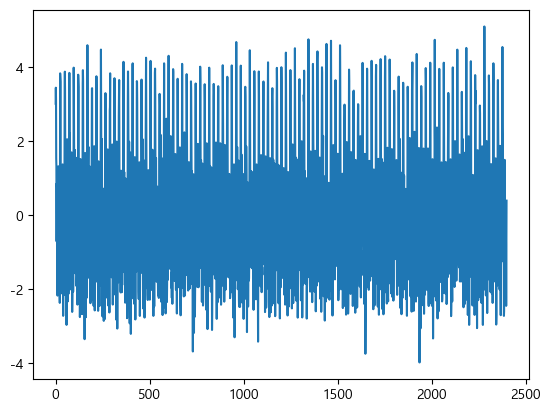

In [51]:
from simul240709_1_2 import *
N=100
arima_lst2000_1_2 = [] 
arima_score2000_1_2= [] 
arima_time2000_1_2= [] 
#model_data = [split_train_test([random_simul_yt[i].round(3)],horizon,lookback ) for i in range(len(random_simul_yt))]

for i in range(N):
    #y_test= random_simul_yt[i][-24:].round(3)
    train_ =np.array(train)[:,72+24*0:][i]
    time1 = time.time()
    model_arima = auto_arima(train_, seasonal=True, trace=True)
    time2 = time.time()  
    
    
    
    pred = model_arima.predict(24)
    
    me1= mean_squared_error(y_test_[i],pred.flatten())
    me2=mean_absolute_error(y_test_[i],pred.flatten())
    me3=mean_absolute_percentage_error(y_test_[i],pred.flatten())
    
    arima_lst2000_1_2.append(pred.flatten())
    arima_score2000_1_2.append([me1,me2,me3])
    arima_time2000_1_2.append(time2-time1)
    
    
arima_lst1000_1_2 = [] 
arima_score1000_1_2= [] 
arima_time1000_1_2= [] 
#model_data = [split_train_test([random_simul_yt[i].round(3)],horizon,lookback ) for i in range(len(random_simul_yt))]

for i in range(N):
    #y_test= random_simul_yt[i][-24:].round(3)
    train_ =np.array(train)[:,72+24*1000:][i]
    time1 = time.time()
    model_arima = auto_arima(train_, seasonal=True, trace=True)
    time2 = time.time()  
    
    
    
    pred = model_arima.predict(24)
    
    me1= mean_squared_error(y_test_[i],pred.flatten())
    me2=mean_absolute_error(y_test_[i],pred.flatten())
    me3=mean_absolute_percentage_error(y_test_[i],pred.flatten())
    
    arima_lst1000_1_2.append(pred.flatten())
    arima_score1000_1_2.append([me1,me2,me3])
    arima_time1000_1_2.append(time2-time1)
    
arima_lst500_1_2 = [] 
arima_score500_1_2= [] 
arima_time500_1_2= [] 
#model_data = [split_train_test([random_simul_yt[i].round(3)],horizon,lookback ) for i in range(len(random_simul_yt))]

for i in range(N):
    #y_test= random_simul_yt[i][-24:].round(3)
    train_ =np.array(train)[:,72+24*1500:][i]
    time1 = time.time()
    model_arima = auto_arima(train_, seasonal=True, trace=True)
    time2 = time.time()  
    
    
    
    pred = model_arima.predict(24)
    
    me1= mean_squared_error(y_test_[i],pred.flatten())
    me2=mean_absolute_error(y_test_[i],pred.flatten())
    me3=mean_absolute_percentage_error(y_test_[i],pred.flatten())
    
    arima_lst500_1_2.append(pred.flatten())
    arima_score500_1_2.append([me1,me2,me3])
    arima_time500_1_2.append(time2-time1)

In [59]:

l1 = [np.array(arima_score500_1_2).mean(axis=0),
np.array(arima_score500_1_3).mean(axis=0),
np.array(arima_score500_2).mean(axis=0),
np.array(arima_score500_3).mean(axis=0),
np.array(arima_score500).mean(axis=0)]

In [60]:
l2=[np.array(arima_score1000_1_2).mean(axis=0),
np.array(arima_score1000_1_3).mean(axis=0),
np.array(arima_score1000_2).mean(axis=0),
np.array(arima_score1000_3).mean(axis=0),
np.array(arima_score1000).mean(axis=0)]

In [61]:
l3=[np.array(arima_score2000_1_2).mean(axis=0),
np.array(arima_score2000_1_3).mean(axis=0),
np.array(arima_score2000_2).mean(axis=0),
np.array(arima_score2000_3).mean(axis=0),
np.array(arima_score2000).mean(axis=0)]

In [72]:

t1 = [np.array(arima_time500_1_2).mean(axis=0),
np.array(arima_time500_1_3).mean(axis=0),
np.array(arima_time500_2).mean(axis=0),
np.array(arima_time500_3).mean(axis=0),
np.array(arima_time500).mean(axis=0)]

In [73]:

t2 = [np.array(arima_time1000_1_2).mean(axis=0),
np.array(arima_time1000_1_3).mean(axis=0),
np.array(arima_time1000_2).mean(axis=0),
np.array(arima_time1000_3).mean(axis=0),
np.array(arima_time1000).mean(axis=0)]

t3 = [np.array(arima_time2000_1_2).mean(axis=0),
np.array(arima_time2000_1_3).mean(axis=0),
np.array(arima_time2000_2).mean(axis=0),
np.array(arima_time2000_3).mean(axis=0),
np.array(arima_time2000).mean(axis=0)]

In [74]:
t1

[144.60513908147811,
 array([1.51474928, 0.96757827, 1.60564237]),
 array([6.1812098 , 1.97493201, 1.3475006 ]),
 array([11.19651548,  2.66008212,  1.2033812 ]),
 array([2.88696141, 1.37960973, 1.72261238])]

In [66]:
df_l1= pd.DataFrame(l1)
df_l1.index = ["500_1_2",'500_1_3','500_2','500_3','500_']
df_l1.to_csv("arima_500.csv")

In [67]:
df_l1= pd.DataFrame(l2)
df_l1.index = ["1000_1_2",'1000_1_3','1000_2','1000_3','1000_']
df_l1.to_csv("arima_1000.csv")

In [68]:
df_l1= pd.DataFrame(l3)
df_l1.index = ["2000_1_2",'2000_1_3','2000_2','2000_3','2000_']
df_l1.to_csv("arima_2000.csv")

In [21]:
nbeats1000 = pd.DataFrame([nbeats_nt1000_score,nbeats_nt1000_score,nbeats_nt1000_score_he9,nbeats_nt1000_score_he4
 ,nbeats_nt1000_score_le9,nbeats_nt1000_score_le4])
nbeats1000.index = ['nbeats_nt1000_score','nbeats_nt1000_score','nbeats_nt1000_score_he9','nbeats_nt1000_score_he4'
 ,'nbeats_nt1000_score_le9','nbeats_nt1000_score_le4']
nbeats1000.to_csv("nbeats2000.csv")

In [20]:
lstm1000 = pd.DataFrame([lstm_nt1000_score,lstm_nt1000_score,lstm_nt1000_score_he9,lstm_nt1000_score_he4
 ,lstm_nt1000_score_le9,lstm_nt1000_score_le4])
lstm1000.index = ['lstm_nt1000_score','lstm_nt1000_score','lstm_nt1000_score_he9','lstm_nt1000_score_he4'
 ,'lstm_nt1000_score_le9','lstm_nt1000_score_le4']
lstm1000.to_csv("lstm_2000.csv")

In [18]:
trend_nbeat= pd.DataFrame(pd.DataFrame(nbeats_nt1000_score).mean(axis=0)).T#,lstm_nt100_score])
trend_lstm= pd.DataFrame(pd.DataFrame(lstm_nt1000_score).mean(axis=0)).T#,lstm_nt100_score])

trend_nbeat1= pd.DataFrame(pd.DataFrame(nbeats_nt1000_score_he9).mean(axis=0)).T#,lstm_nt100_score])
trend_lstm1= pd.DataFrame(pd.DataFrame(lstm_nt1000_score_he9).mean(axis=0)).T#,lstm_nt100_score])

trend_nbeat2= pd.DataFrame(pd.DataFrame(nbeats_nt1000_score_he4).mean(axis=0)).T#,lstm_nt100_score])
trend_lstm2= pd.DataFrame(pd.DataFrame(lstm_nt1000_score_he4).mean(axis=0)).T#,lstm_nt100_score])

trend_nbeat3= pd.DataFrame(pd.DataFrame(nbeats_nt1000_score_le9).mean(axis=0)).T#,lstm_nt100_score])
trend_lstm3= pd.DataFrame(pd.DataFrame(lstm_nt1000_score_le9).mean(axis=0)).T#,lstm_nt100_score])

trend_nbeat4= pd.DataFrame(pd.DataFrame(nbeats_nt1000_score_le4).mean(axis=0)).T#,lstm_nt100_score])
trend_lstm4= pd.DataFrame(pd.DataFrame(lstm_nt1000_score_le4).mean(axis=0)).T#,lstm_nt100_score])





trend_y= pd.concat([trend_nbeat,trend_lstm,
                   trend_nbeat1,trend_lstm1,
                     trend_nbeat2,trend_lstm2,
                     trend_nbeat3,trend_lstm3,
                     trend_nbeat4,trend_lstm4
                   ],axis=0)
trend_y.columns = ['MSE','MAE','MAPE']
trend_y.index = ['nbeats','lstm',
                'nbeats_he9','lstm_he9',
                'nbeats_he4','lstm_he4',
                'nbeats_le9','lstm_le9',
                'nbeats_le4','lstm_le4']
trend_y

,MSE,MAE,MAPE
nbeats,1.399598,0.941498,2.905728e+11
lstm,1.204753,0.859687,8.330611e-01
nbeats_he9,11.986316,2.753268,4.104151e+00
lstm_he9,14.269872,2.947574,4.011773e+00
nbeats_he4,5.232362,1.824812,3.975787e+00
lstm_he4,6.586432,1.990177,1.655777e+00
nbeats_le9,0.137142,0.294171,1.233844e+12
lstm_le9,0.083057,0.226460,4.138111e-01
nbeats_le4,0.314133,0.444947,2.833747e+12
lstm_le4,0.203832,0.349382,7.938495e-01


In [19]:
trend_y.to_csv("lee2000.csv")

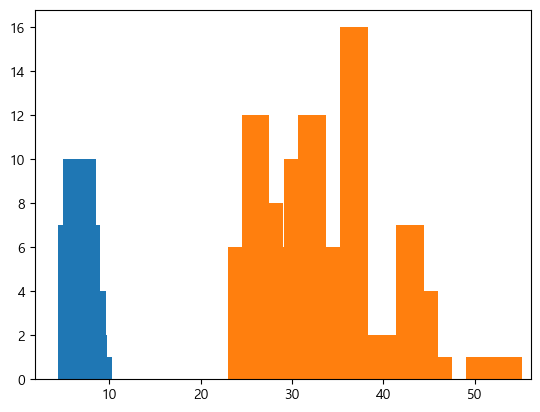

In [30]:
plt.hist(nbeats_nt1000_time, bins= 20, width = 3);
plt.hist(lstm_nt1000_time,  bins= 20, width = 3);

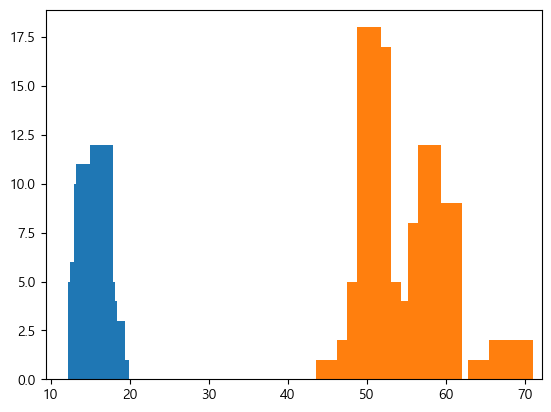

In [31]:
plt.hist(nbeats_nt1000_time_he4, bins= 20, width = 3);
plt.hist(lstm_nt1000_time_he4,  bins= 20, width = 3);

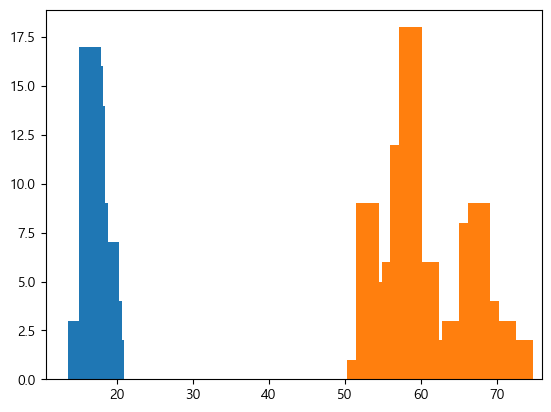

In [32]:
plt.hist(nbeats_nt1000_time_he9, bins= 20, width = 3);
plt.hist(lstm_nt1000_time_he9
         ,  bins= 20, width = 3);

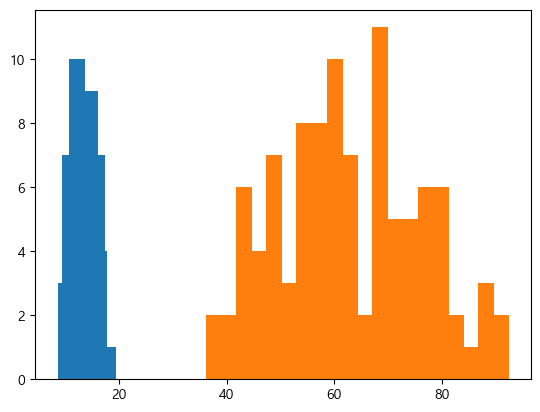

In [33]:
plt.hist(nbeats_nt1000_time_le4, bins= 20, width = 3);
plt.hist(lstm_nt1000_time_le4,  bins= 20, width = 3);

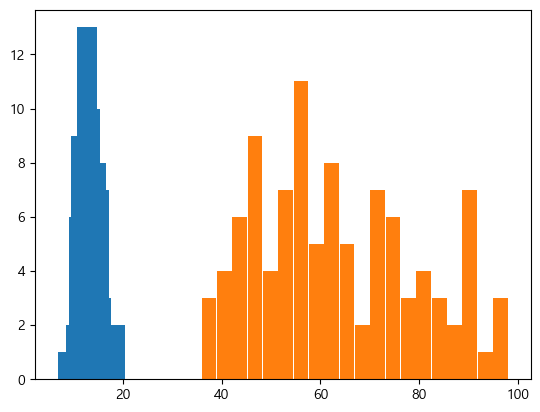

In [34]:
plt.hist(nbeats_nt1000_time_le9, bins= 20, width = 3);
plt.hist(lstm_nt1000_time_le9,  bins= 20, width = 3);